# Library Imports

In [29]:
# Imports
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

#Reading data and Generating our data set variant using our ids

In [30]:
# Load the CSV file
from google.colab import drive
drive.mount('/content/drive')

id_1 = 7487 #change to first student id
id_2 = 7597 #change to second student id
id_3 = 7409 #change to third student id "leave 0000 if team of 2"

random_seed = id_1+id_2+id_3
random.seed(random_seed)
data_path='/content/drive/MyDrive/Data.csv' #replace with data path
output_path='/content/drive/MyDrive/your_data.csv' #replace with output data path

all_data=pd.read_csv(data_path)
all_columns = all_data.columns.tolist()

target_column = 'smoking'

all_columns.remove(target_column)

selected_columns = random.sample(all_columns, 10)

print(selected_columns) #MUST BE PRINTED
selected_columns = np.append(selected_columns, target_column)
data = all_data[selected_columns].copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['ALT', 'eyesight(left)', 'hemoglobin', 'age', 'waist(cm)', 'hearing(right)', 'id', 'height(cm)', 'systolic', 'HDL']


In [31]:
data.head()

ALT  eyesight(left)  hemoglobin  age  waist(cm)  hearing(right)  id  \
0   25             0.5        16.5   55       81.0               1   0   
1   23             0.6        16.2   70       89.0               2   1   
2   31             0.4        17.4   20       81.0               1   2   
3   27             1.5        15.9   35      105.0               1   3   
4   13             1.5        15.4   30       80.5               1   4   

   height(cm)  systolic  HDL  smoking  
0         165       135   40        1  
1         165       146   57        0  
2         170       118   45        1  
3         180       131   38        0  
4         165       121   44        1

In [32]:
data = data.drop('id', axis=1)

since id attribute is an auto increment attribute used for indexing it's no good to use it

In [33]:
data.head()

ALT  eyesight(left)  hemoglobin  age  waist(cm)  hearing(right)  \
0   25             0.5        16.5   55       81.0               1   
1   23             0.6        16.2   70       89.0               2   
2   31             0.4        17.4   20       81.0               1   
3   27             1.5        15.9   35      105.0               1   
4   13             1.5        15.4   30       80.5               1   

   height(cm)  systolic  HDL  smoking  
0         165       135   40        1  
1         165       146   57        0  
2         170       118   45        1  
3         180       131   38        0  
4         165       121   44        1

In [34]:
data.to_csv(output_path, index=False)   #From HERE YOU CAN SPLIT FOR TRAIN ,VALID AND TEST

# Data spliting

In [35]:
# Randomly splitting the dataset into (70% Training + 15% Testing + 15% Validation)
data_train, data_temp = train_test_split(data, test_size = 0.3)
data_test, data_validate = train_test_split(data_temp, test_size = 0.5)

# Univariate Analysis

In [36]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111479 entries, 112849 to 57617
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ALT             111479 non-null  int64  
 1   eyesight(left)  111479 non-null  float64
 2   hemoglobin      111479 non-null  float64
 3   age             111479 non-null  int64  
 4   waist(cm)       111479 non-null  float64
 5   hearing(right)  111479 non-null  int64  
 6   height(cm)      111479 non-null  int64  
 7   systolic        111479 non-null  int64  
 8   HDL             111479 non-null  int64  
 9   smoking         111479 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 9.4 MB


### Central Tendency & Dispersion:

In [37]:
data_train.describe()

ALT  eyesight(left)     hemoglobin            age  \
count  111479.000000   111479.000000  111479.000000  111479.000000   
mean       26.539025        1.006102      14.793888      44.319145   
std        16.019601        0.402362       1.434894      11.846594   
min         1.000000        0.100000       4.900000      20.000000   
25%        16.000000        0.800000      13.800000      40.000000   
50%        22.000000        1.000000      15.000000      40.000000   
75%        32.000000        1.200000      15.800000      55.000000   
max      1612.000000        9.900000      20.400000      85.000000   

           waist(cm)  hearing(right)     height(cm)       systolic  \
count  111479.000000   111479.000000  111479.000000  111479.000000   
mean       82.993420        1.023753     165.246809     122.475166   
std         8.956527        0.152280       8.828943      12.719375   
min        51.000000        1.000000     135.000000      80.000000   
25%        77.000000        1.000000     160.000000     114.000000   
50%        83.000000        1.000000     165.000000     121.000000   
75%        89.000000        1.000000     170.000000     130.000000   
max       127.000000        2.000000     190.000000     213.000000   

                 HDL        smoking  
count  111479.000000  111479.000000  
mean       55.856673       0.437751  
std        13.959852       0.496112  
min         9.000000       0.000000  
25%        45.000000       0.000000  
50%        54.000000       0.000000  
75%        64.000000       1.000000  
max       136.000000       1.000000

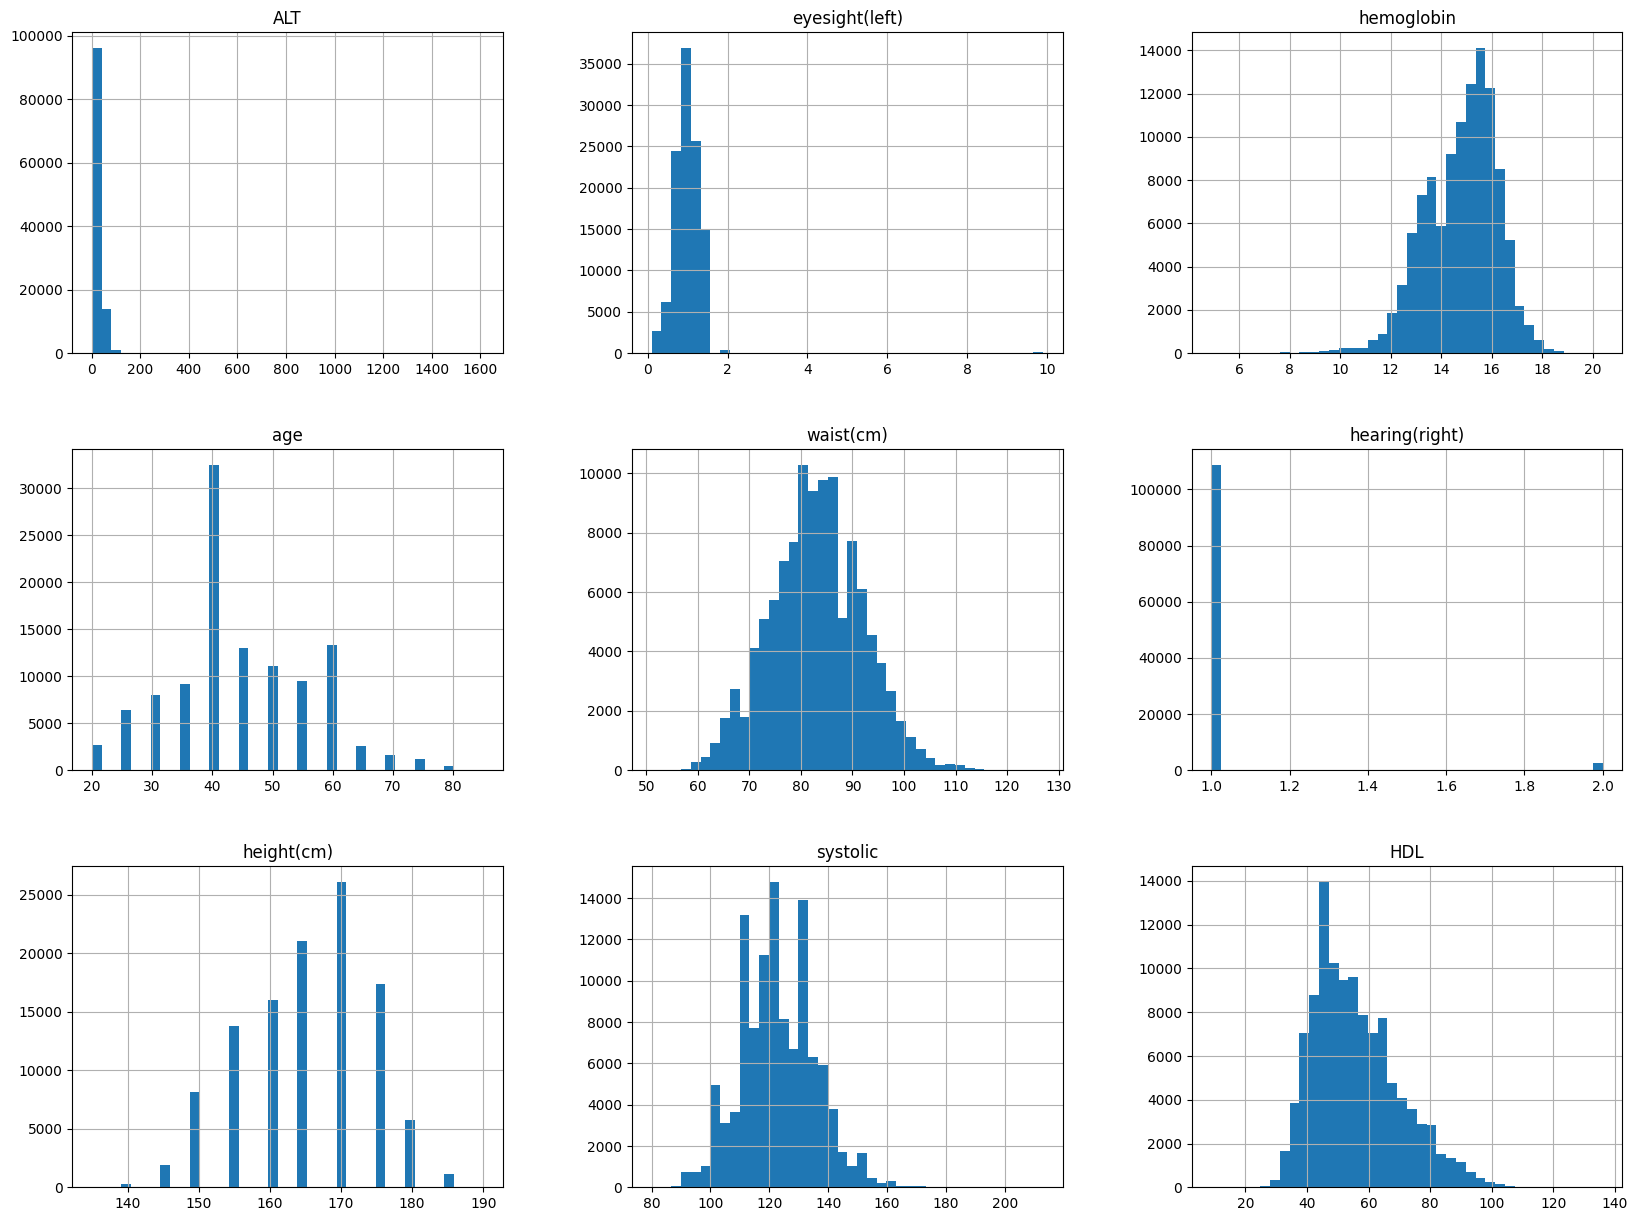

In [38]:
#data.hist(bins=50,figsize=(20,15))
data_train[['ALT','eyesight(left)','hemoglobin'	,'age','waist(cm)','hearing(right)','height(cm)','systolic','HDL']].hist(bins=40,figsize=(20,15))
plt.show()

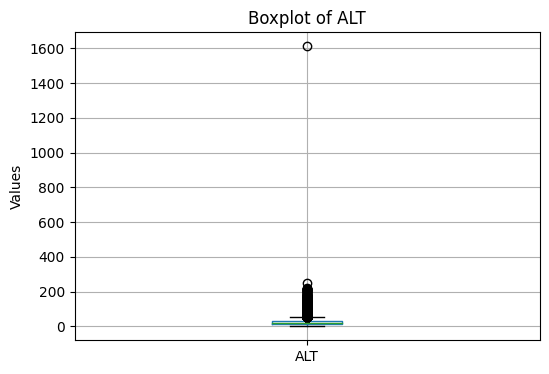

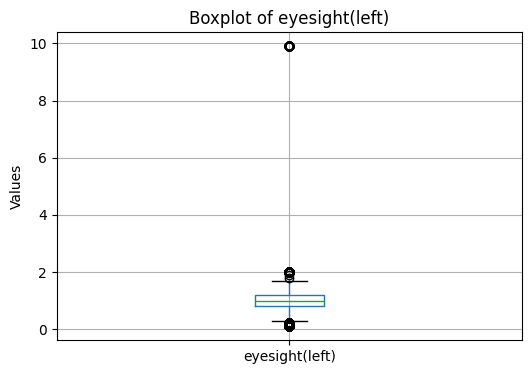

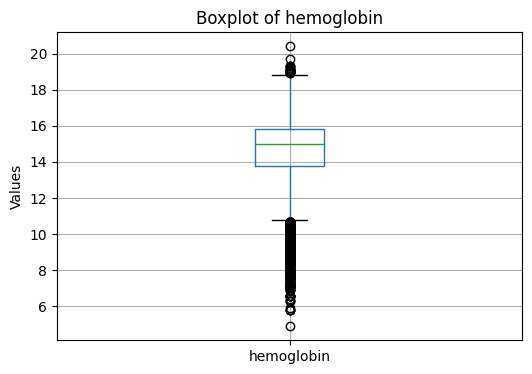

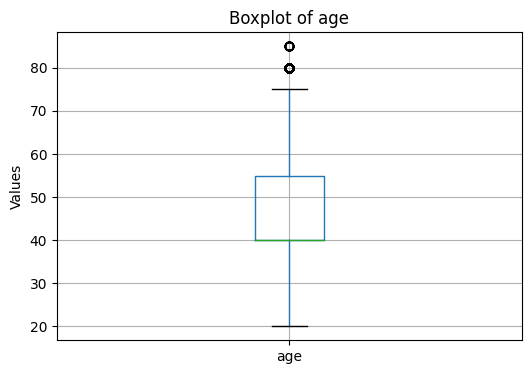

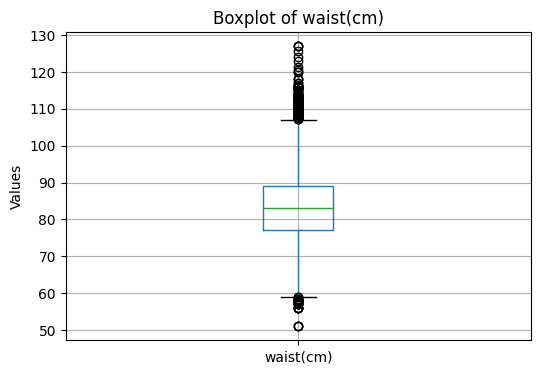

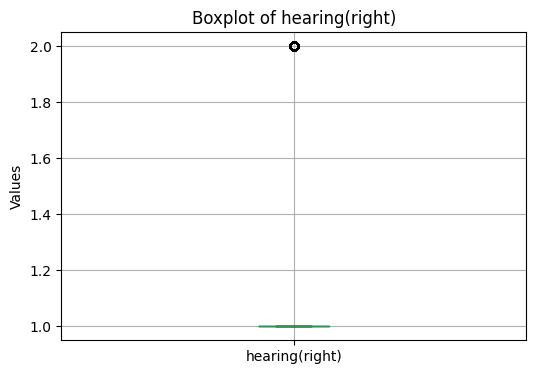

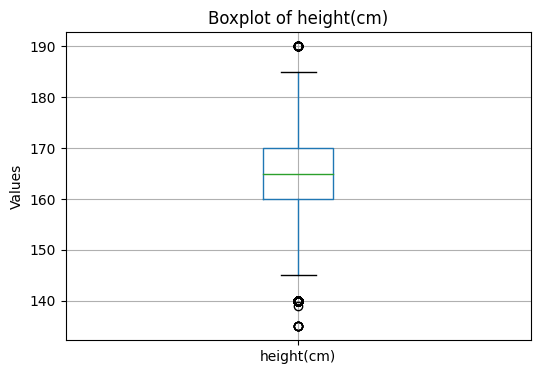

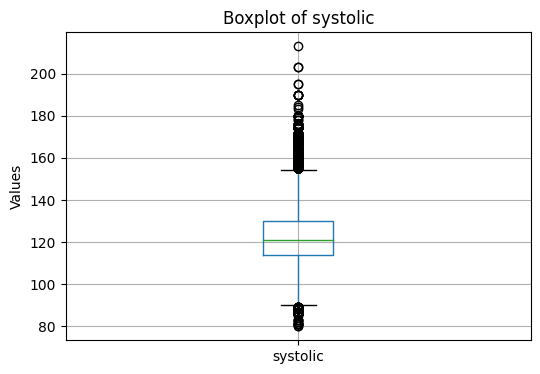

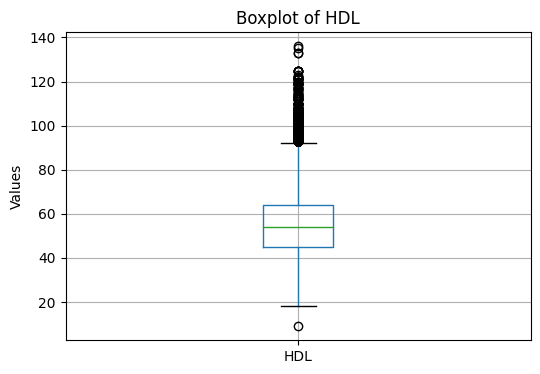

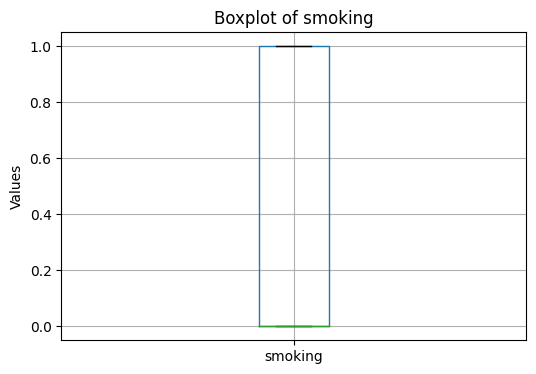

In [39]:
for column in data_train.columns:
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    data_train.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.show()

# Bivariate Analysis

In [40]:
data_train.corr()
corr_matrix=data.corr()
corr_matrix["smoking"].sort_values(ascending=False)

smoking           1.000000
hemoglobin        0.450679
height(cm)        0.447111
waist(cm)         0.262715
ALT               0.163016
eyesight(left)    0.100420
systolic          0.058642
hearing(right)   -0.036858
age              -0.206033
HDL              -0.271186
Name: smoking, dtype: float64

<Axes: >

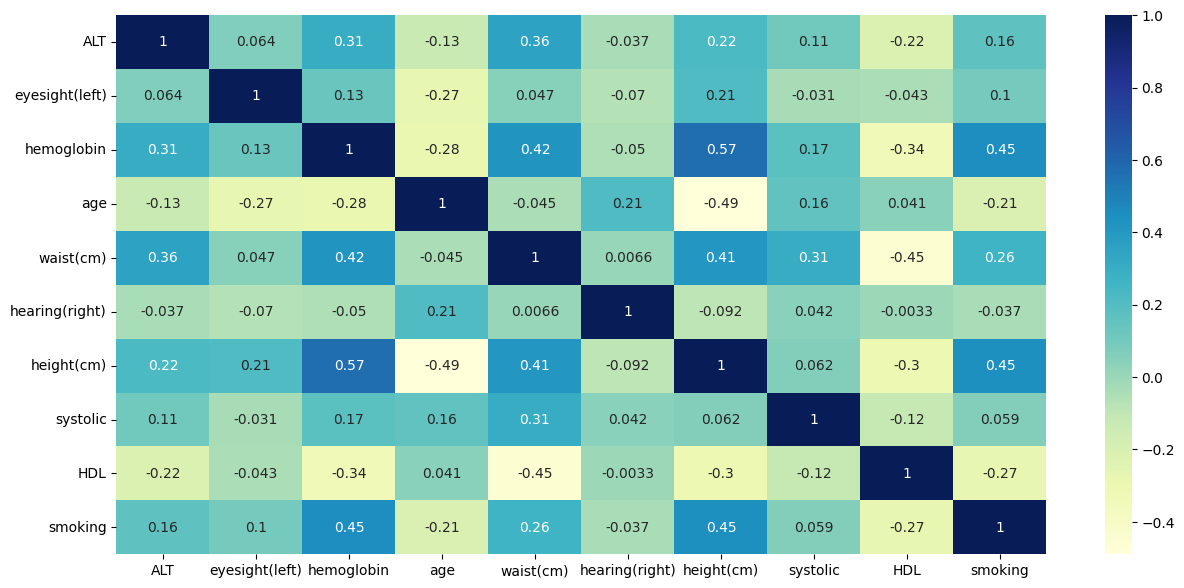

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

Notes:

* hemoglibin -> animia
- ALT related to liver functions
-wasit -> obese/fat ->bad health
-height     -> high direct correlation with smoking but inverse correlation with age therefore smokers tend to be older
-HDL(High density fat) benefical -> good health inverse correlation with smoking

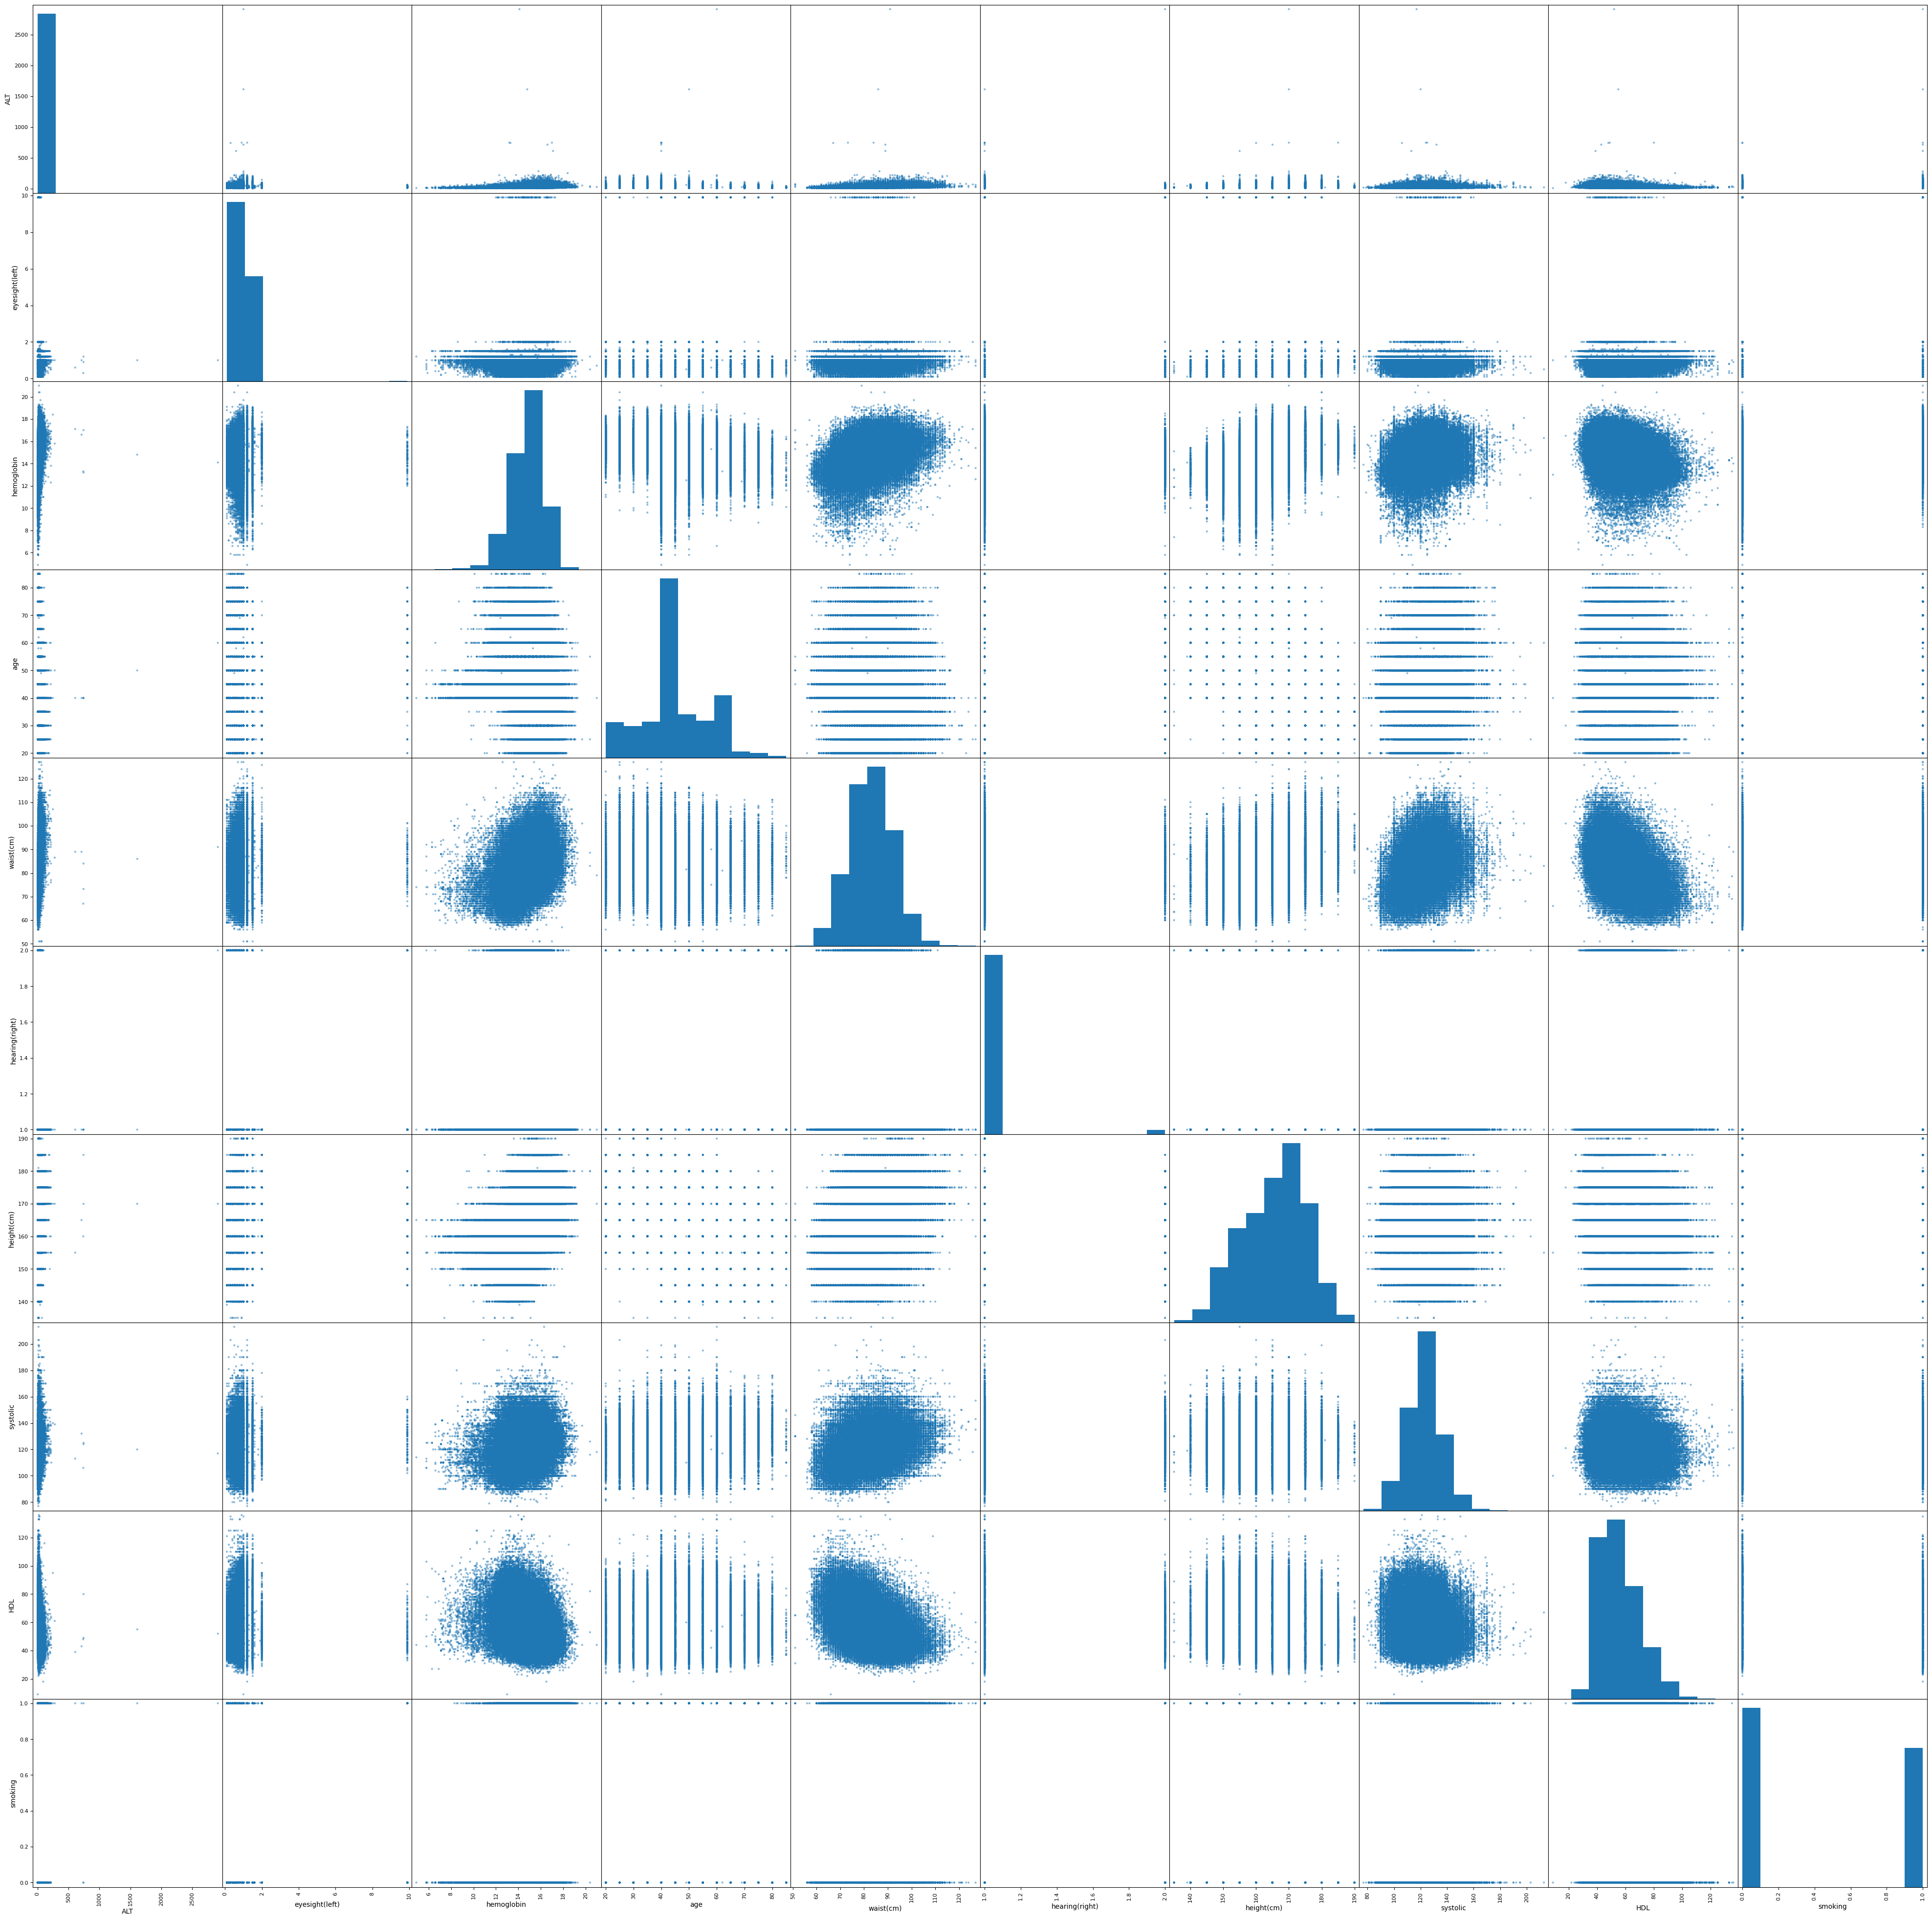

In [44]:
scatter_matrix(data, figsize=(50, 50))
plt.show()

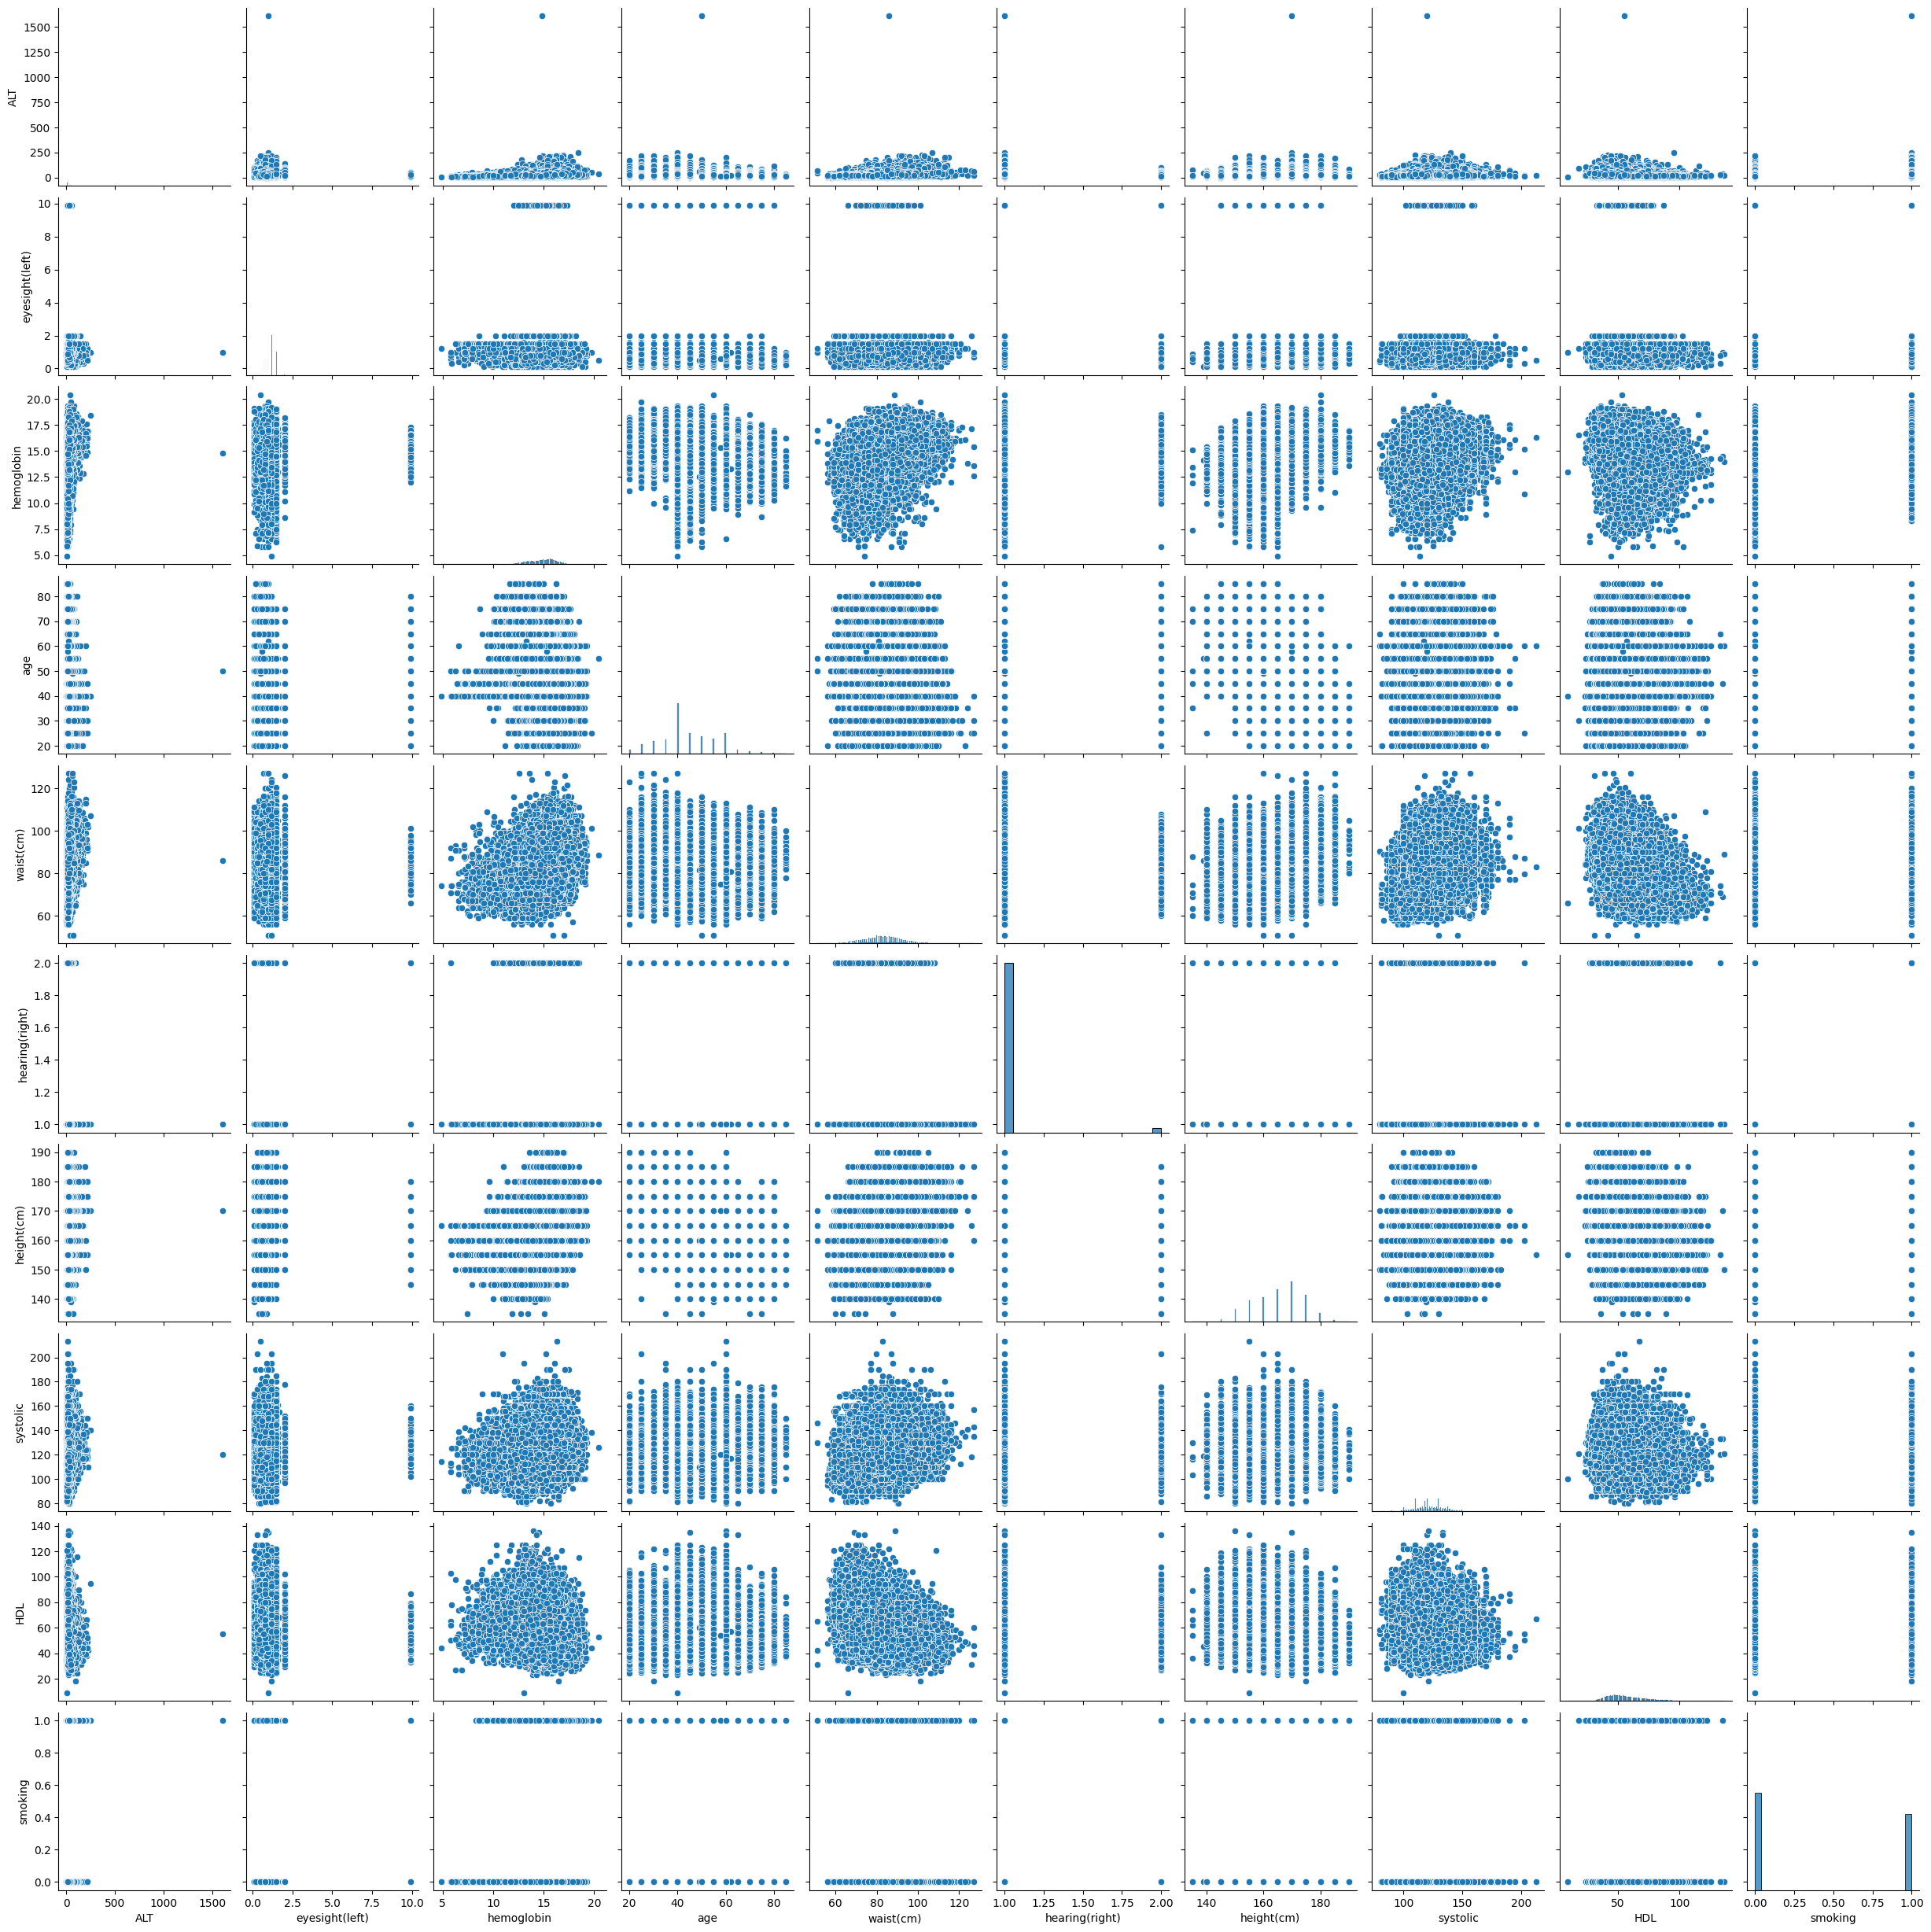

In [45]:
sns.pairplot(data_train)

In [15]:
features =['ALT','eyesight(left)','hemoglobin'	,'age','waist(cm)','hearing(right)','height(cm)','systolic','HDL']

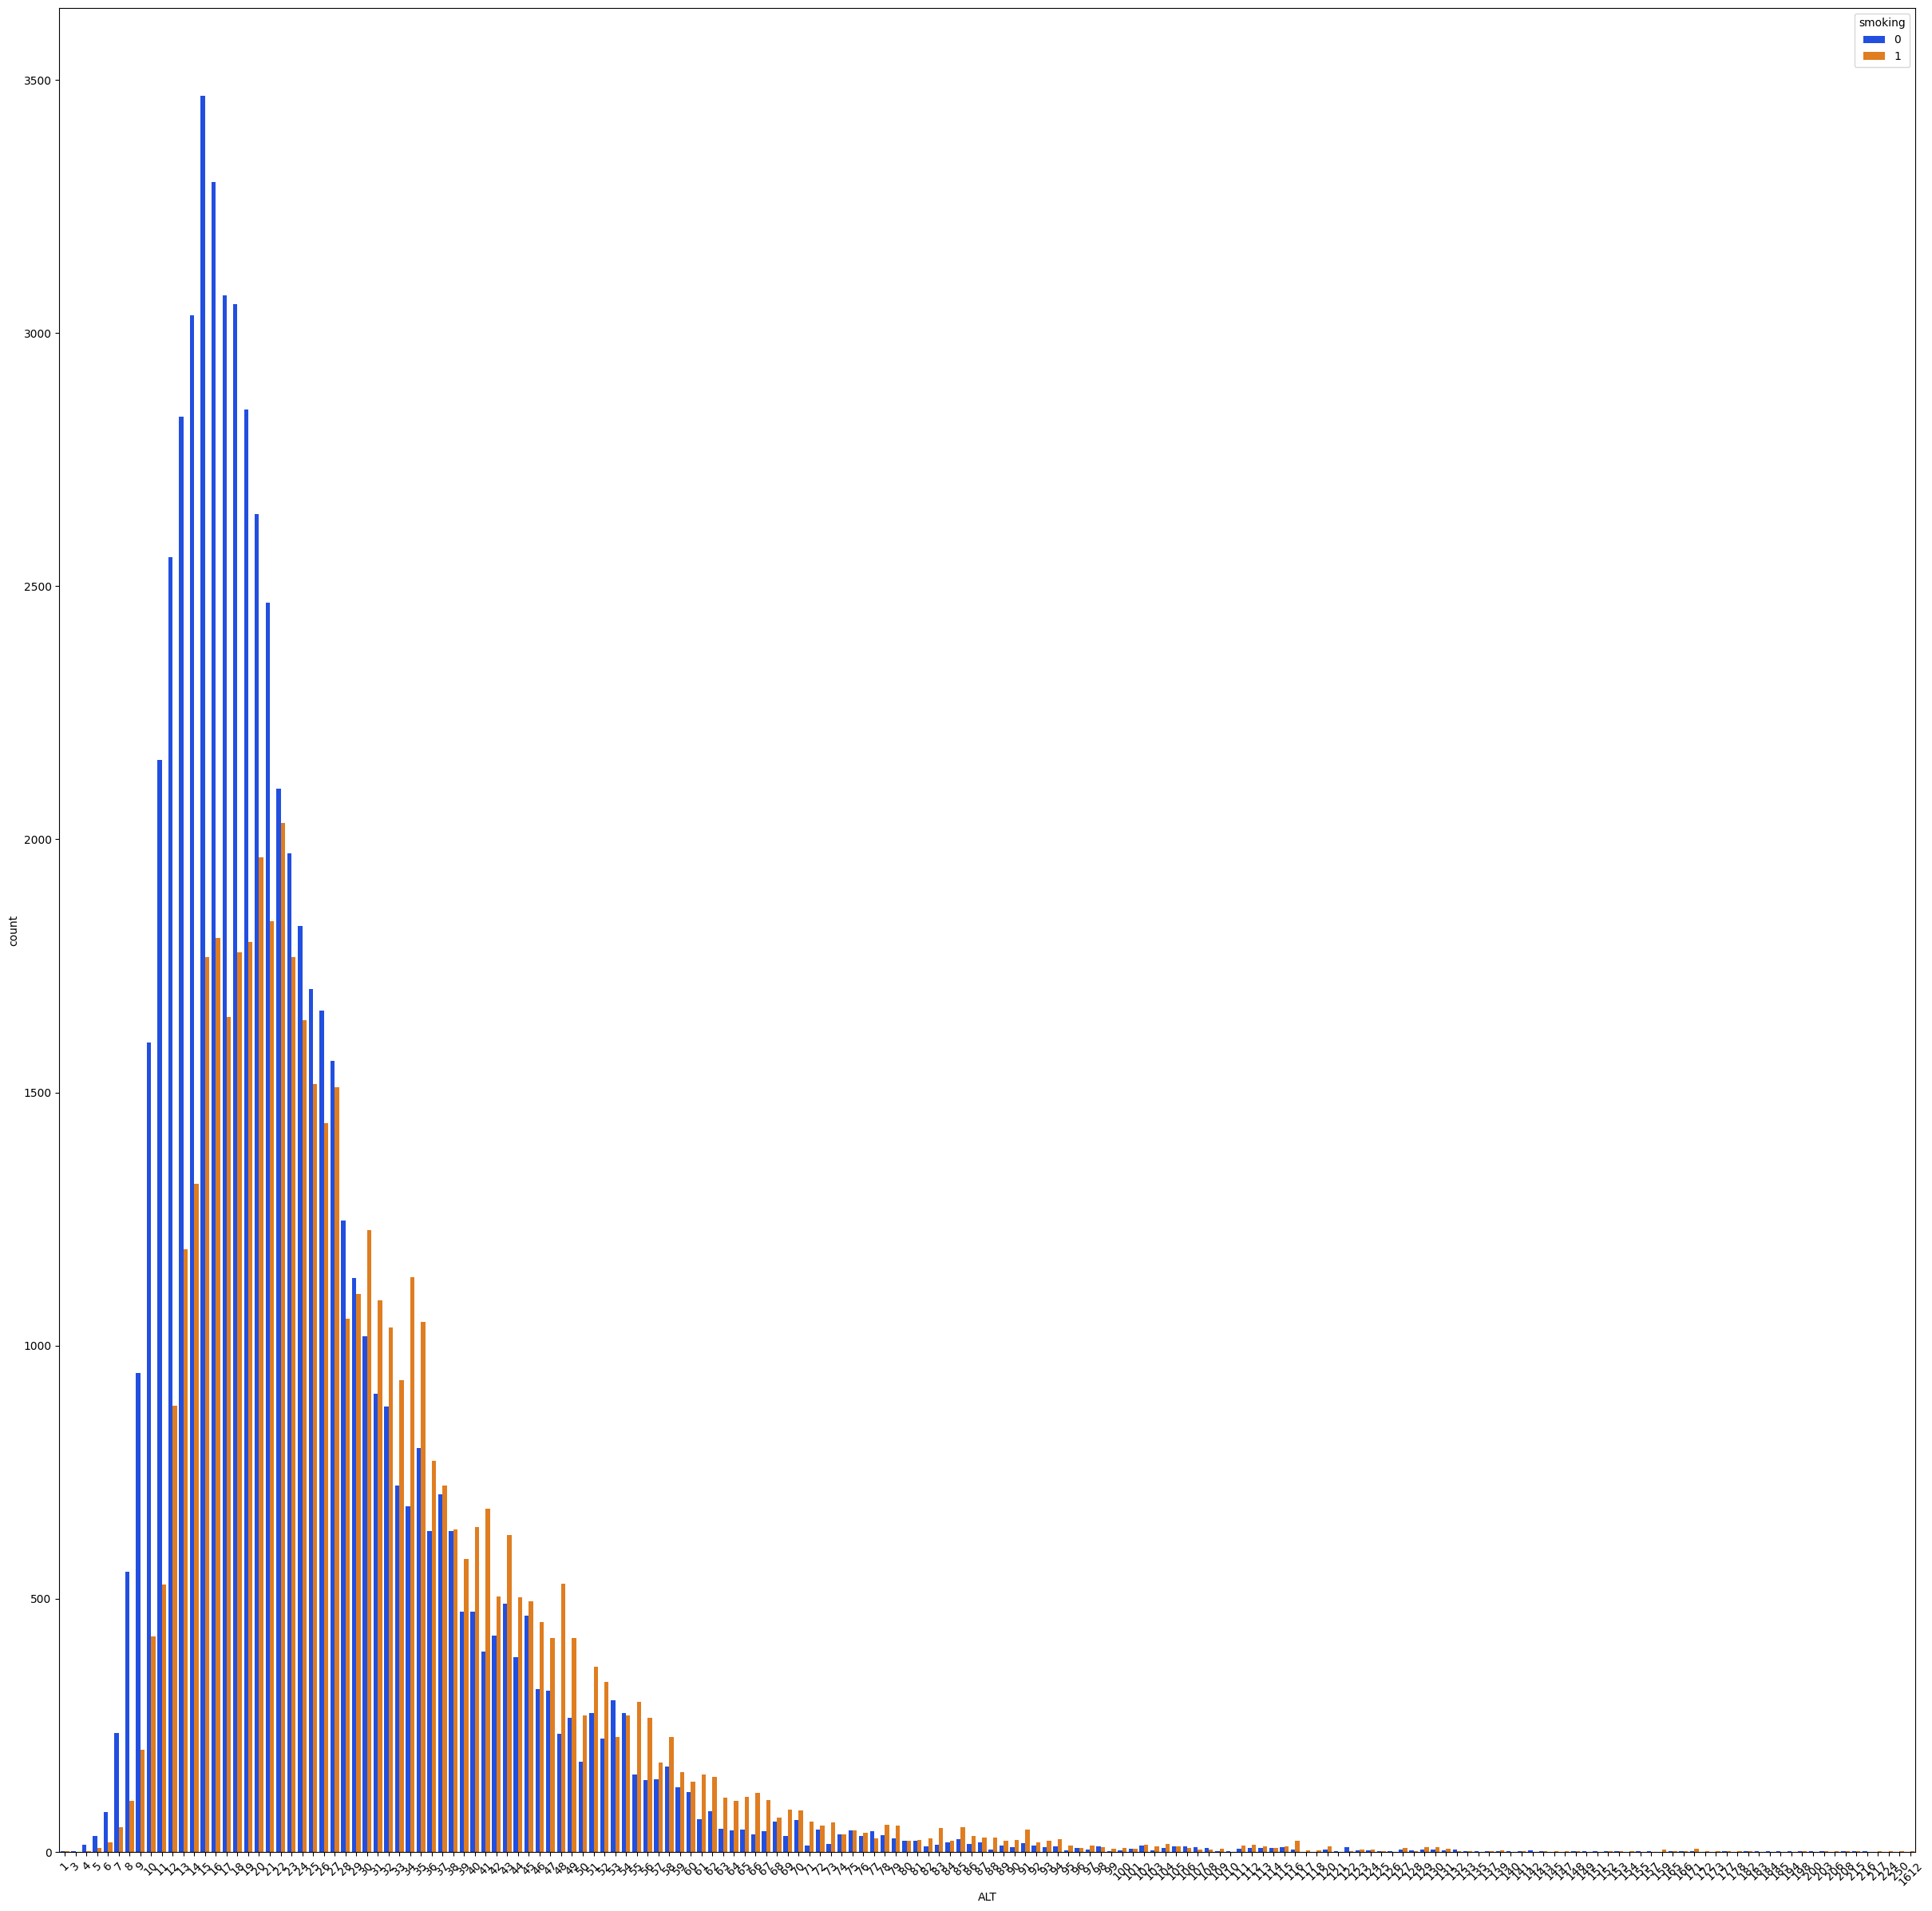

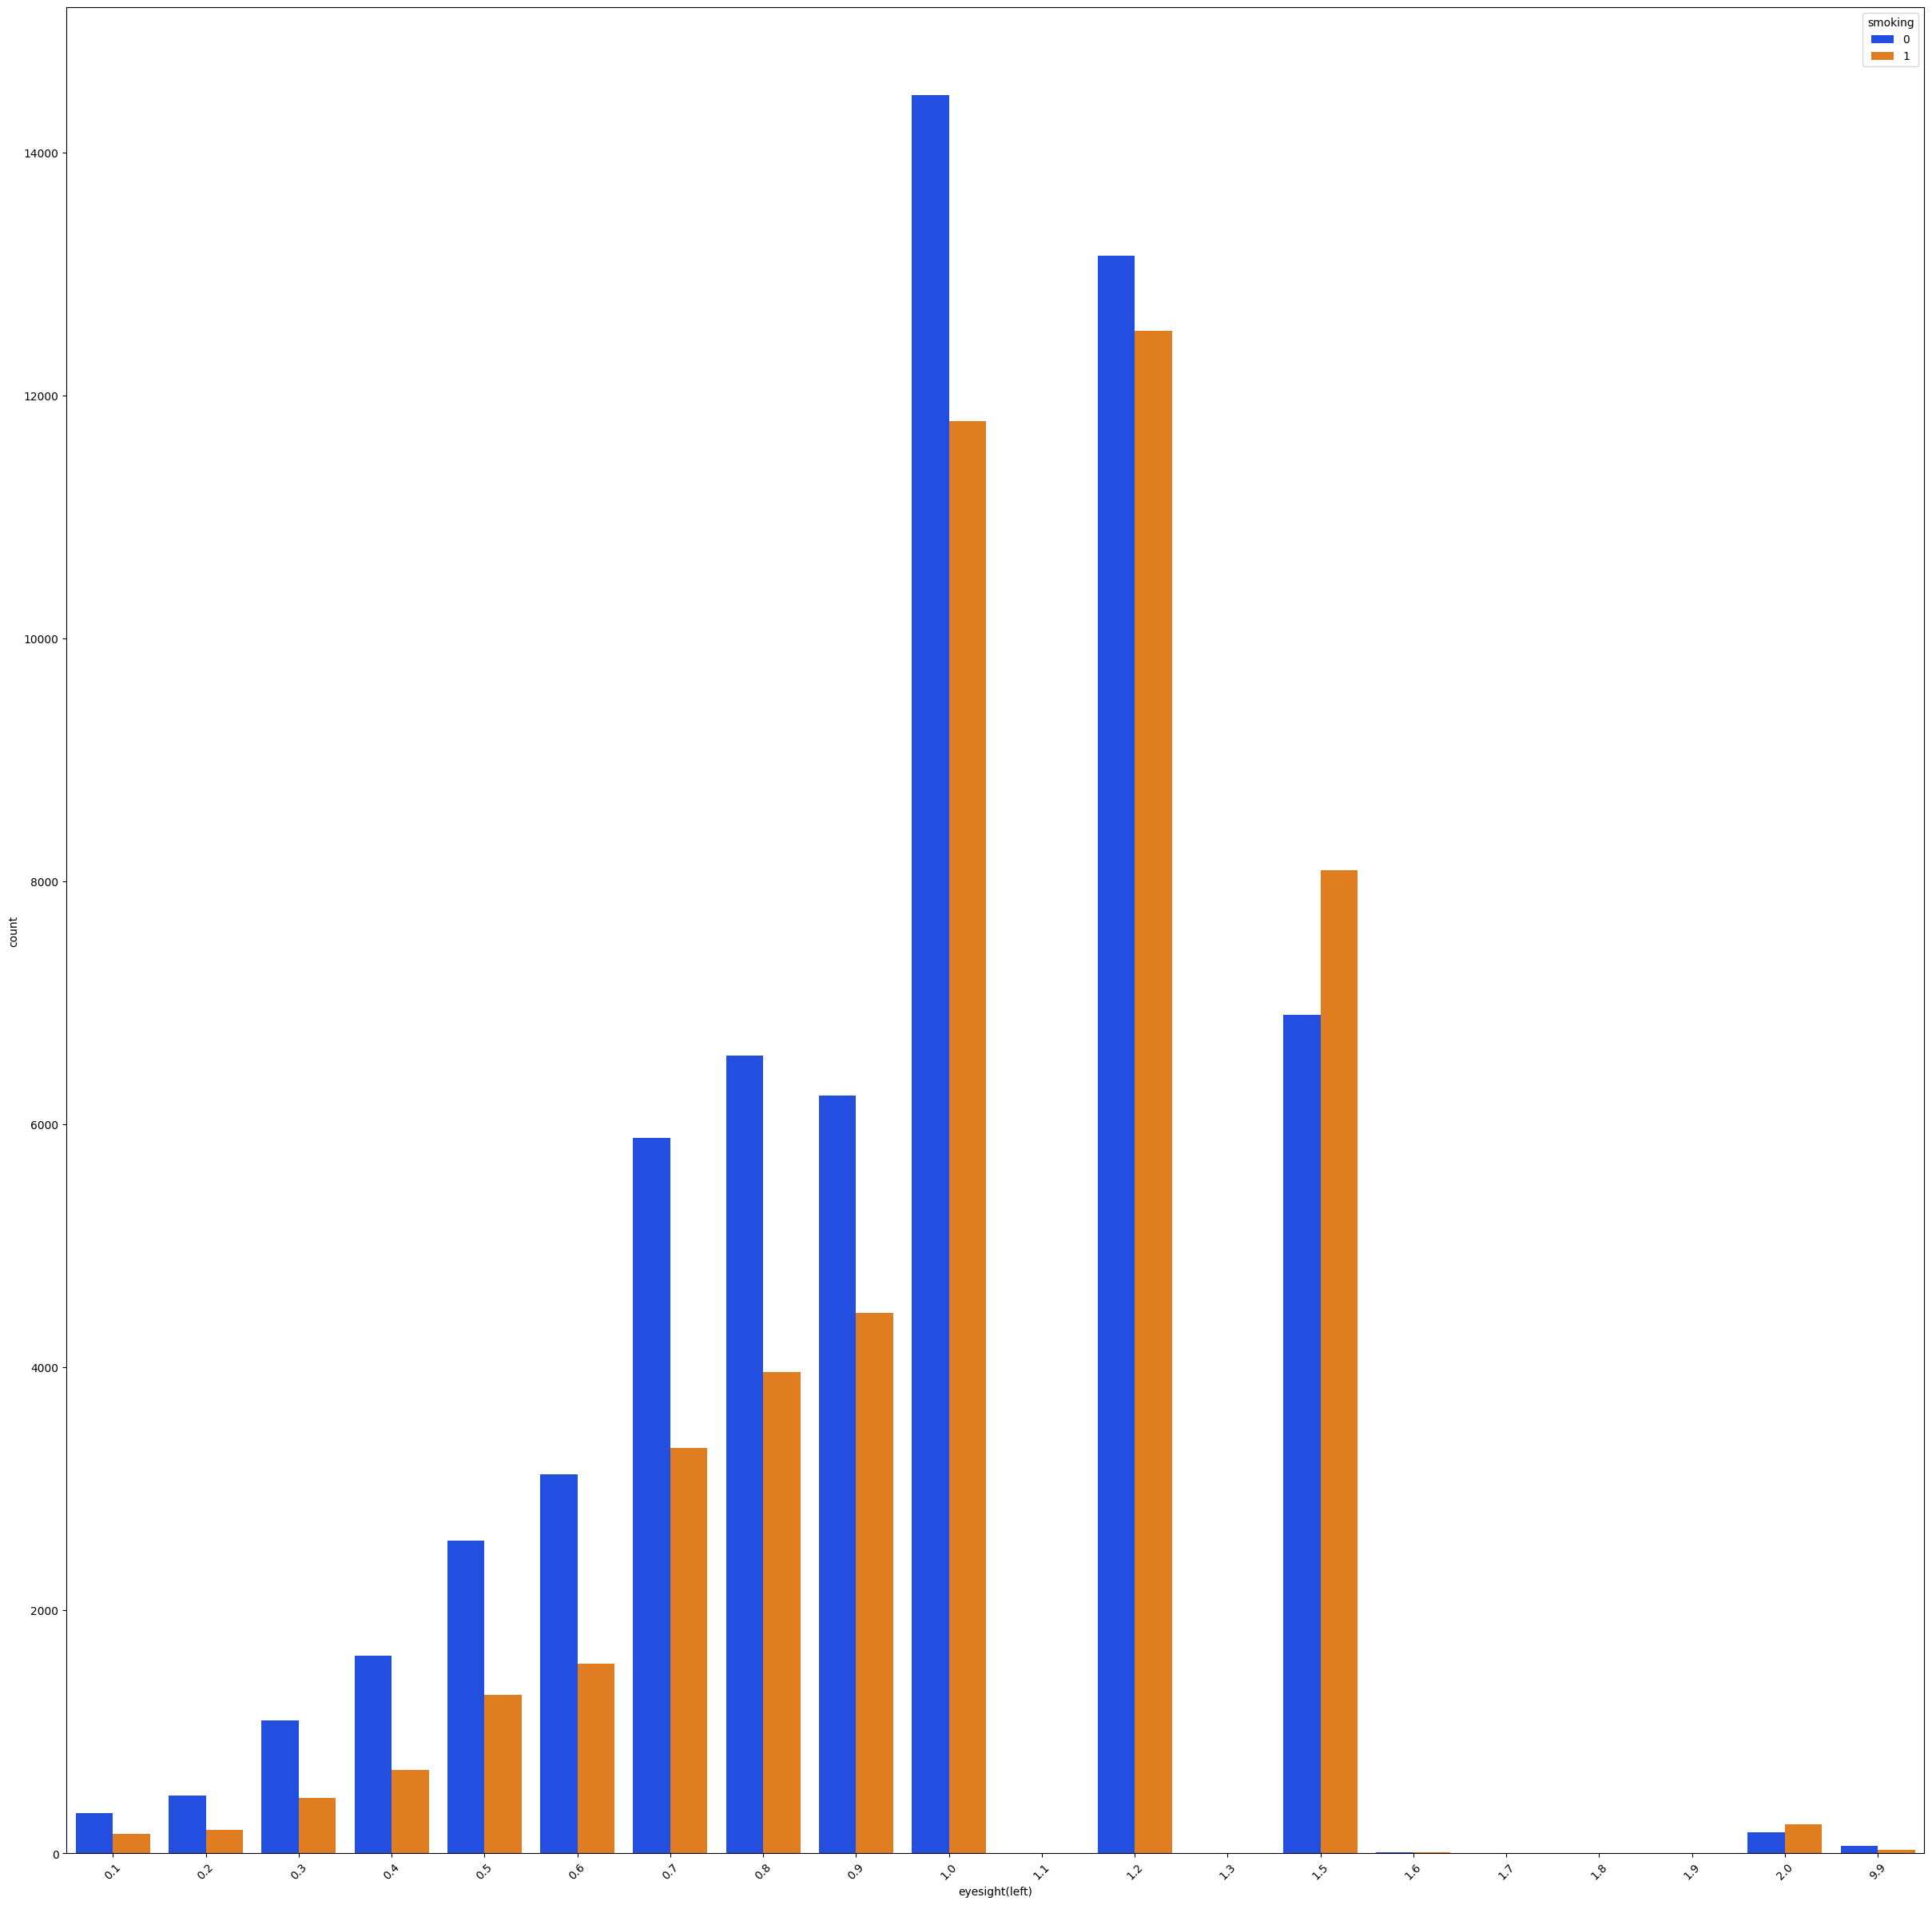

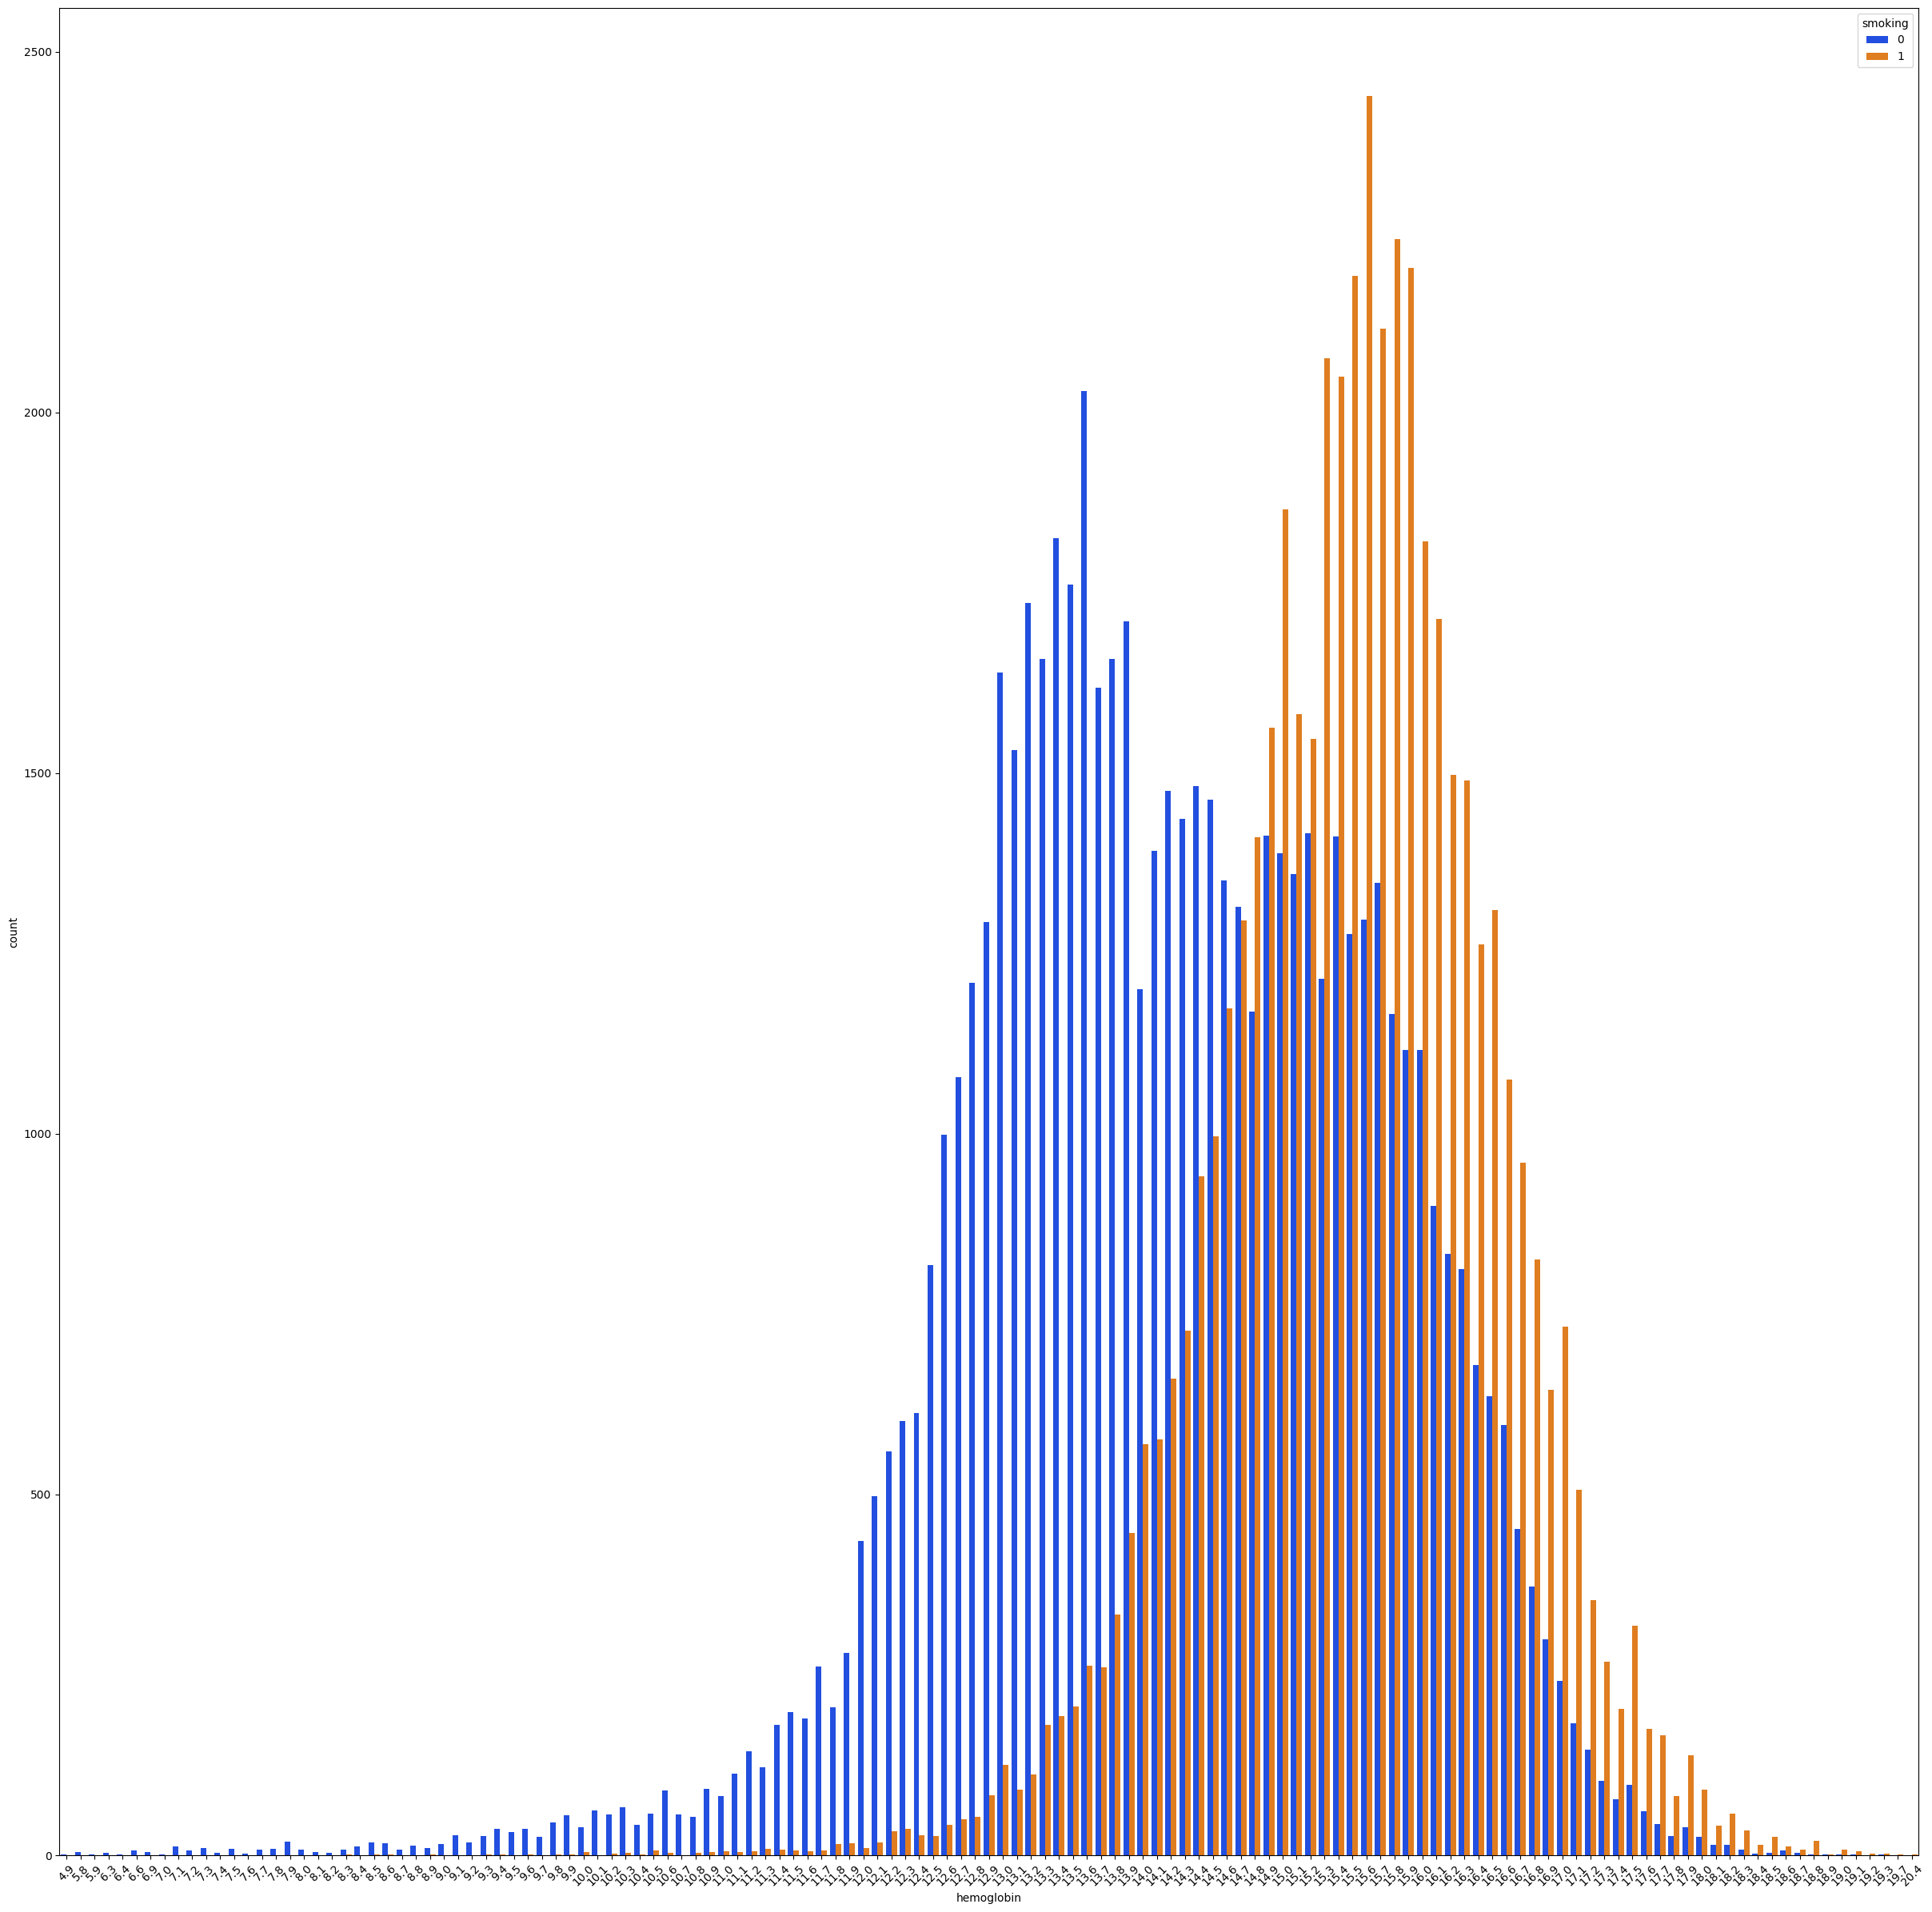

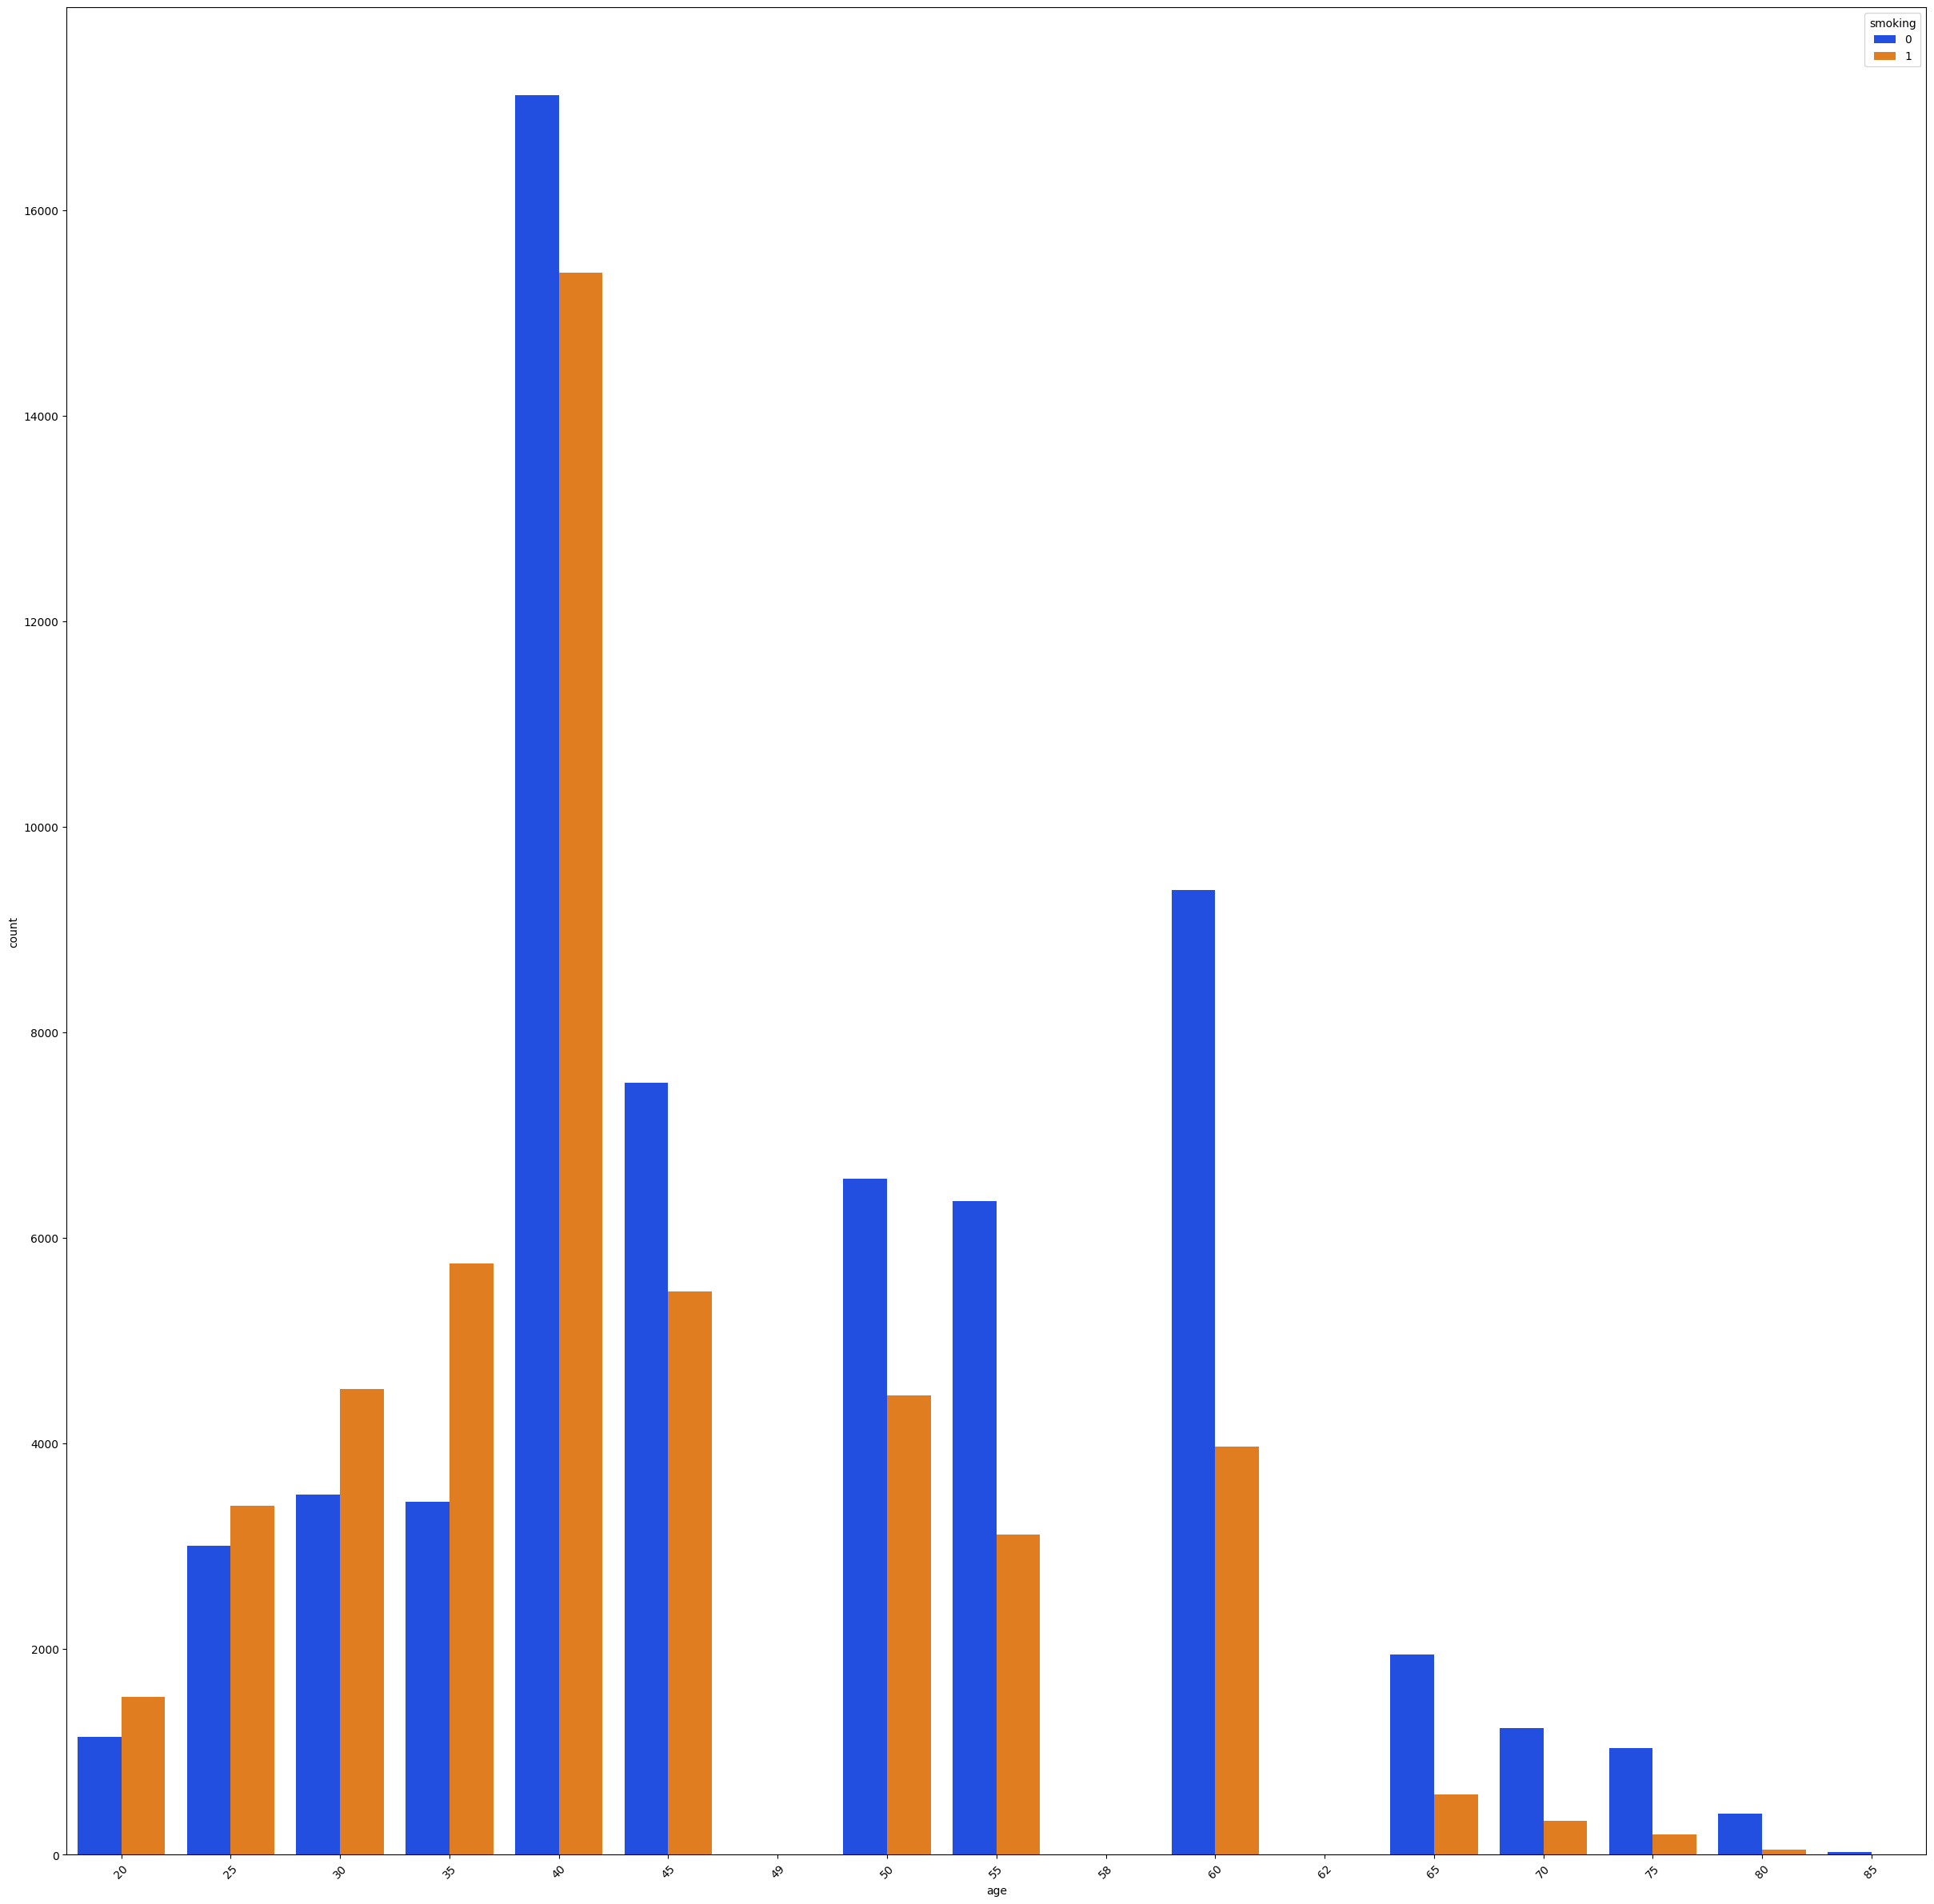

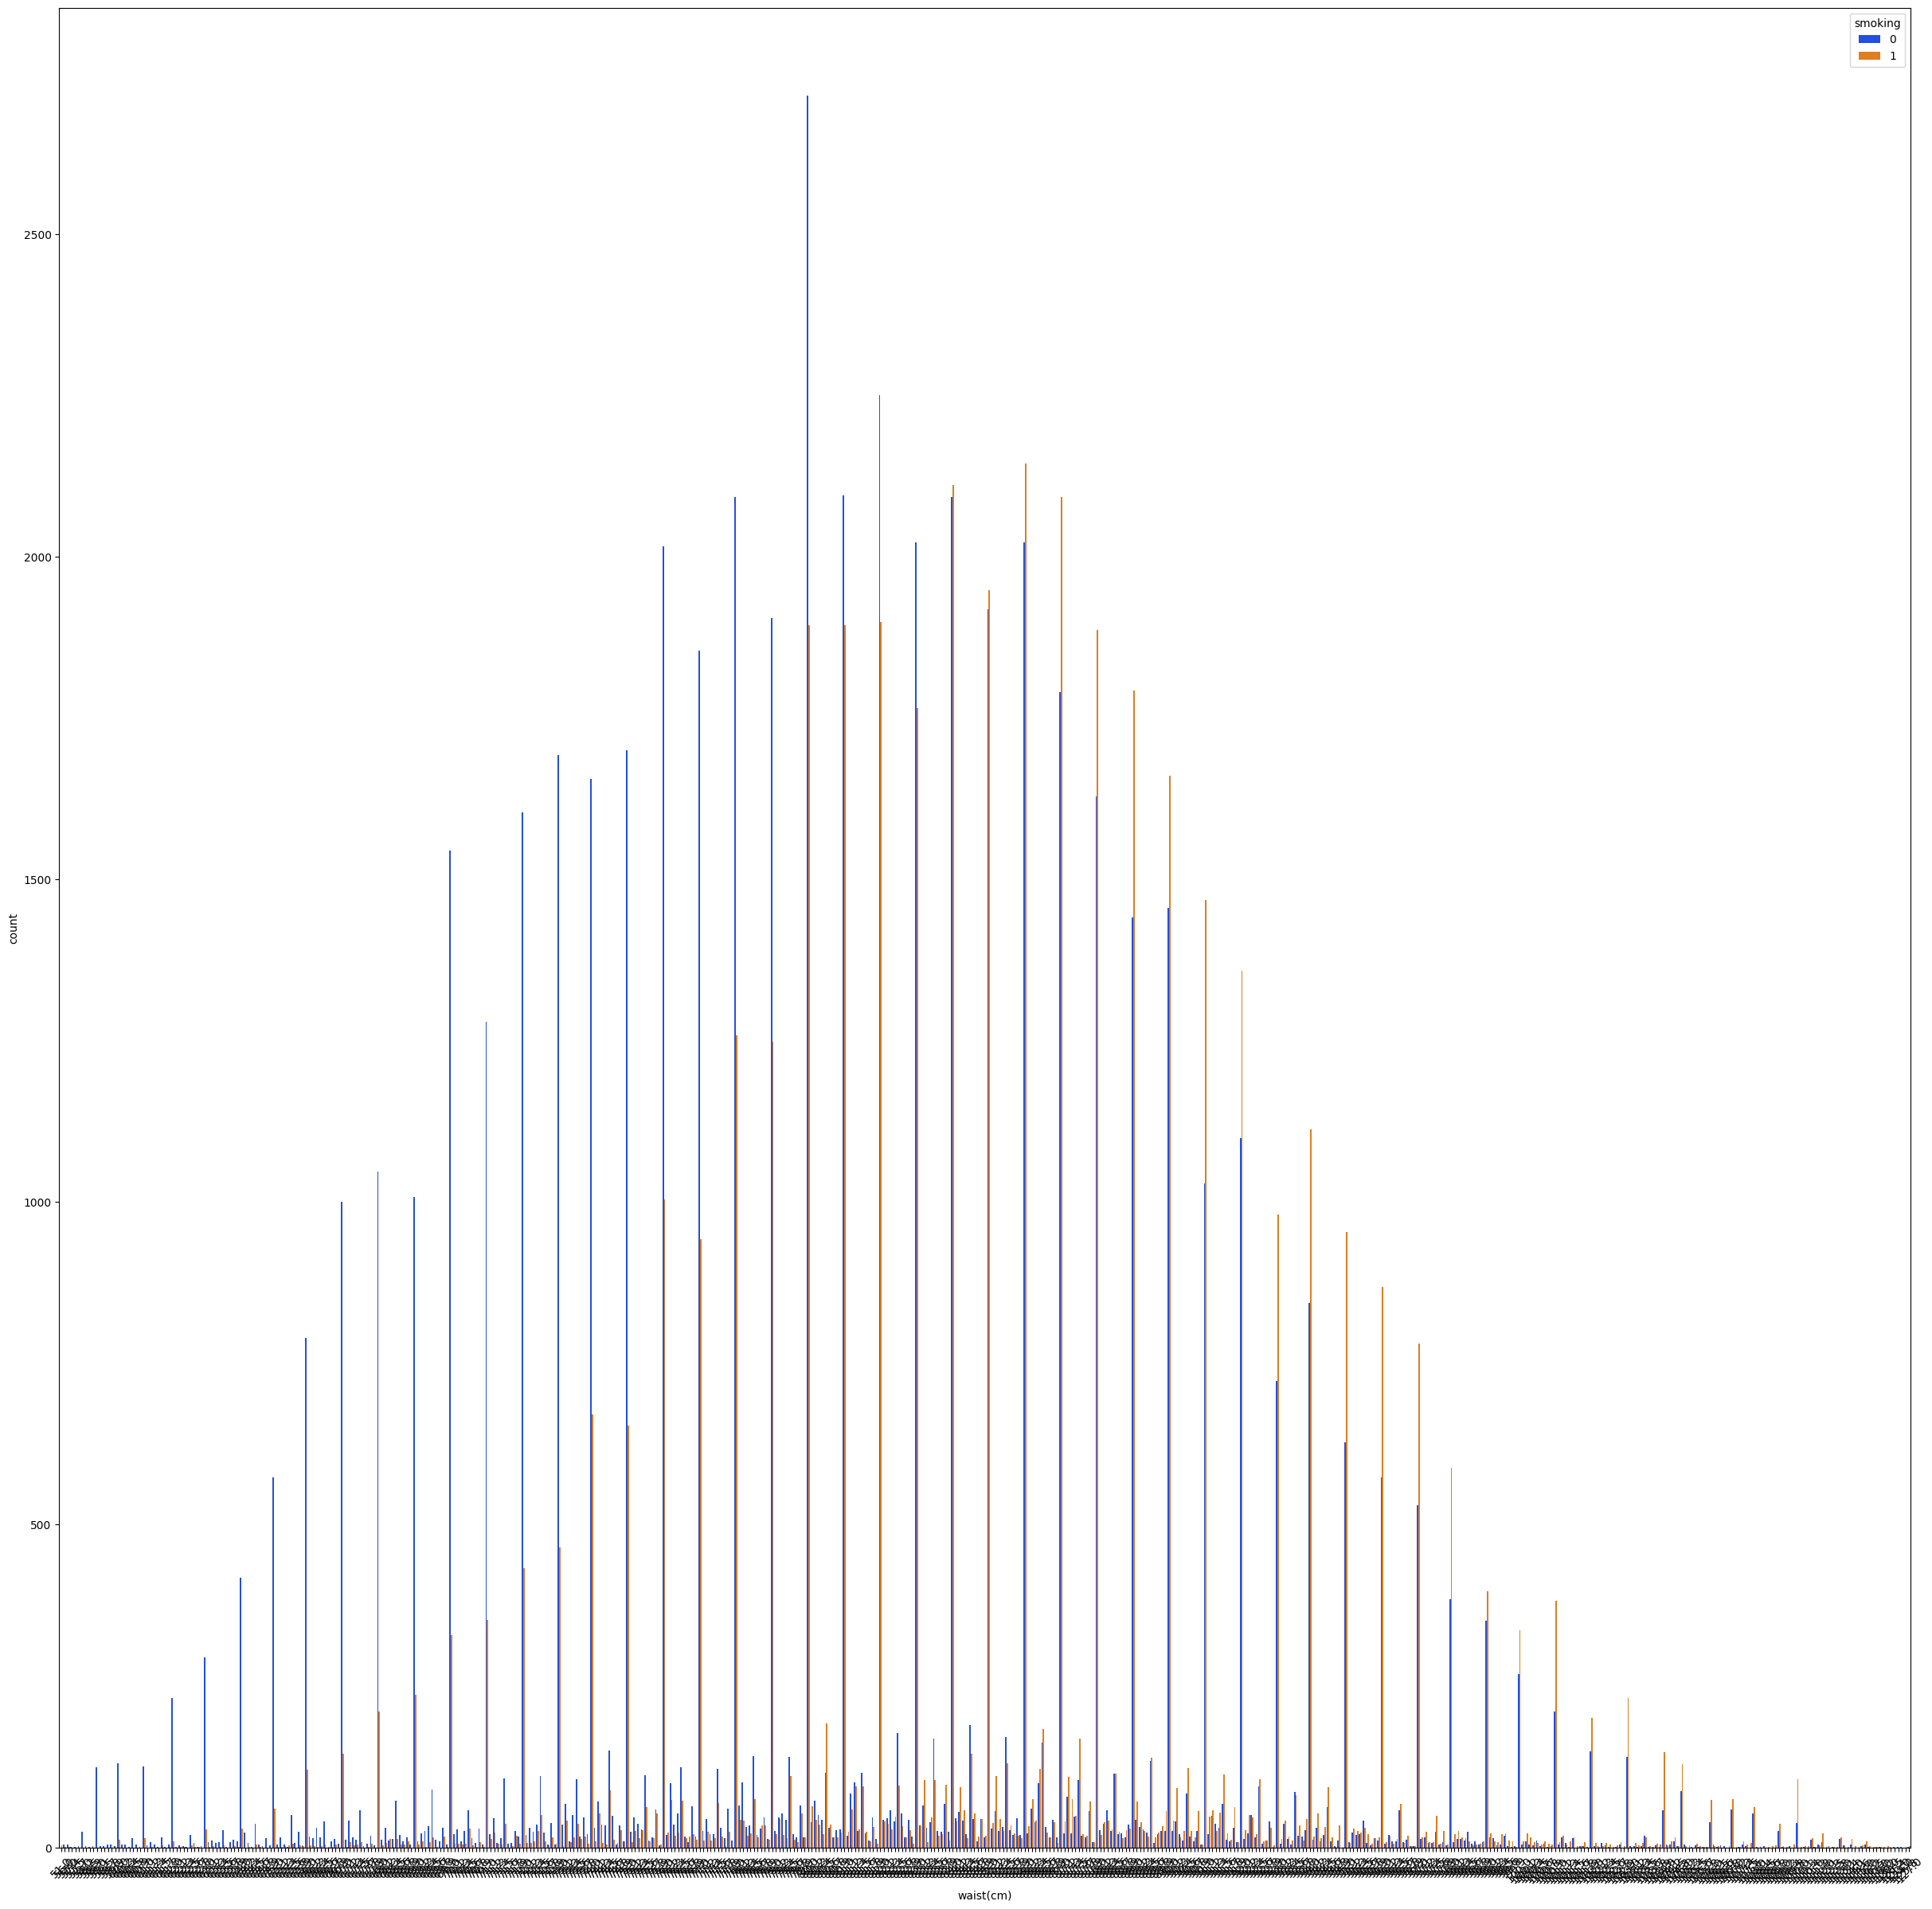

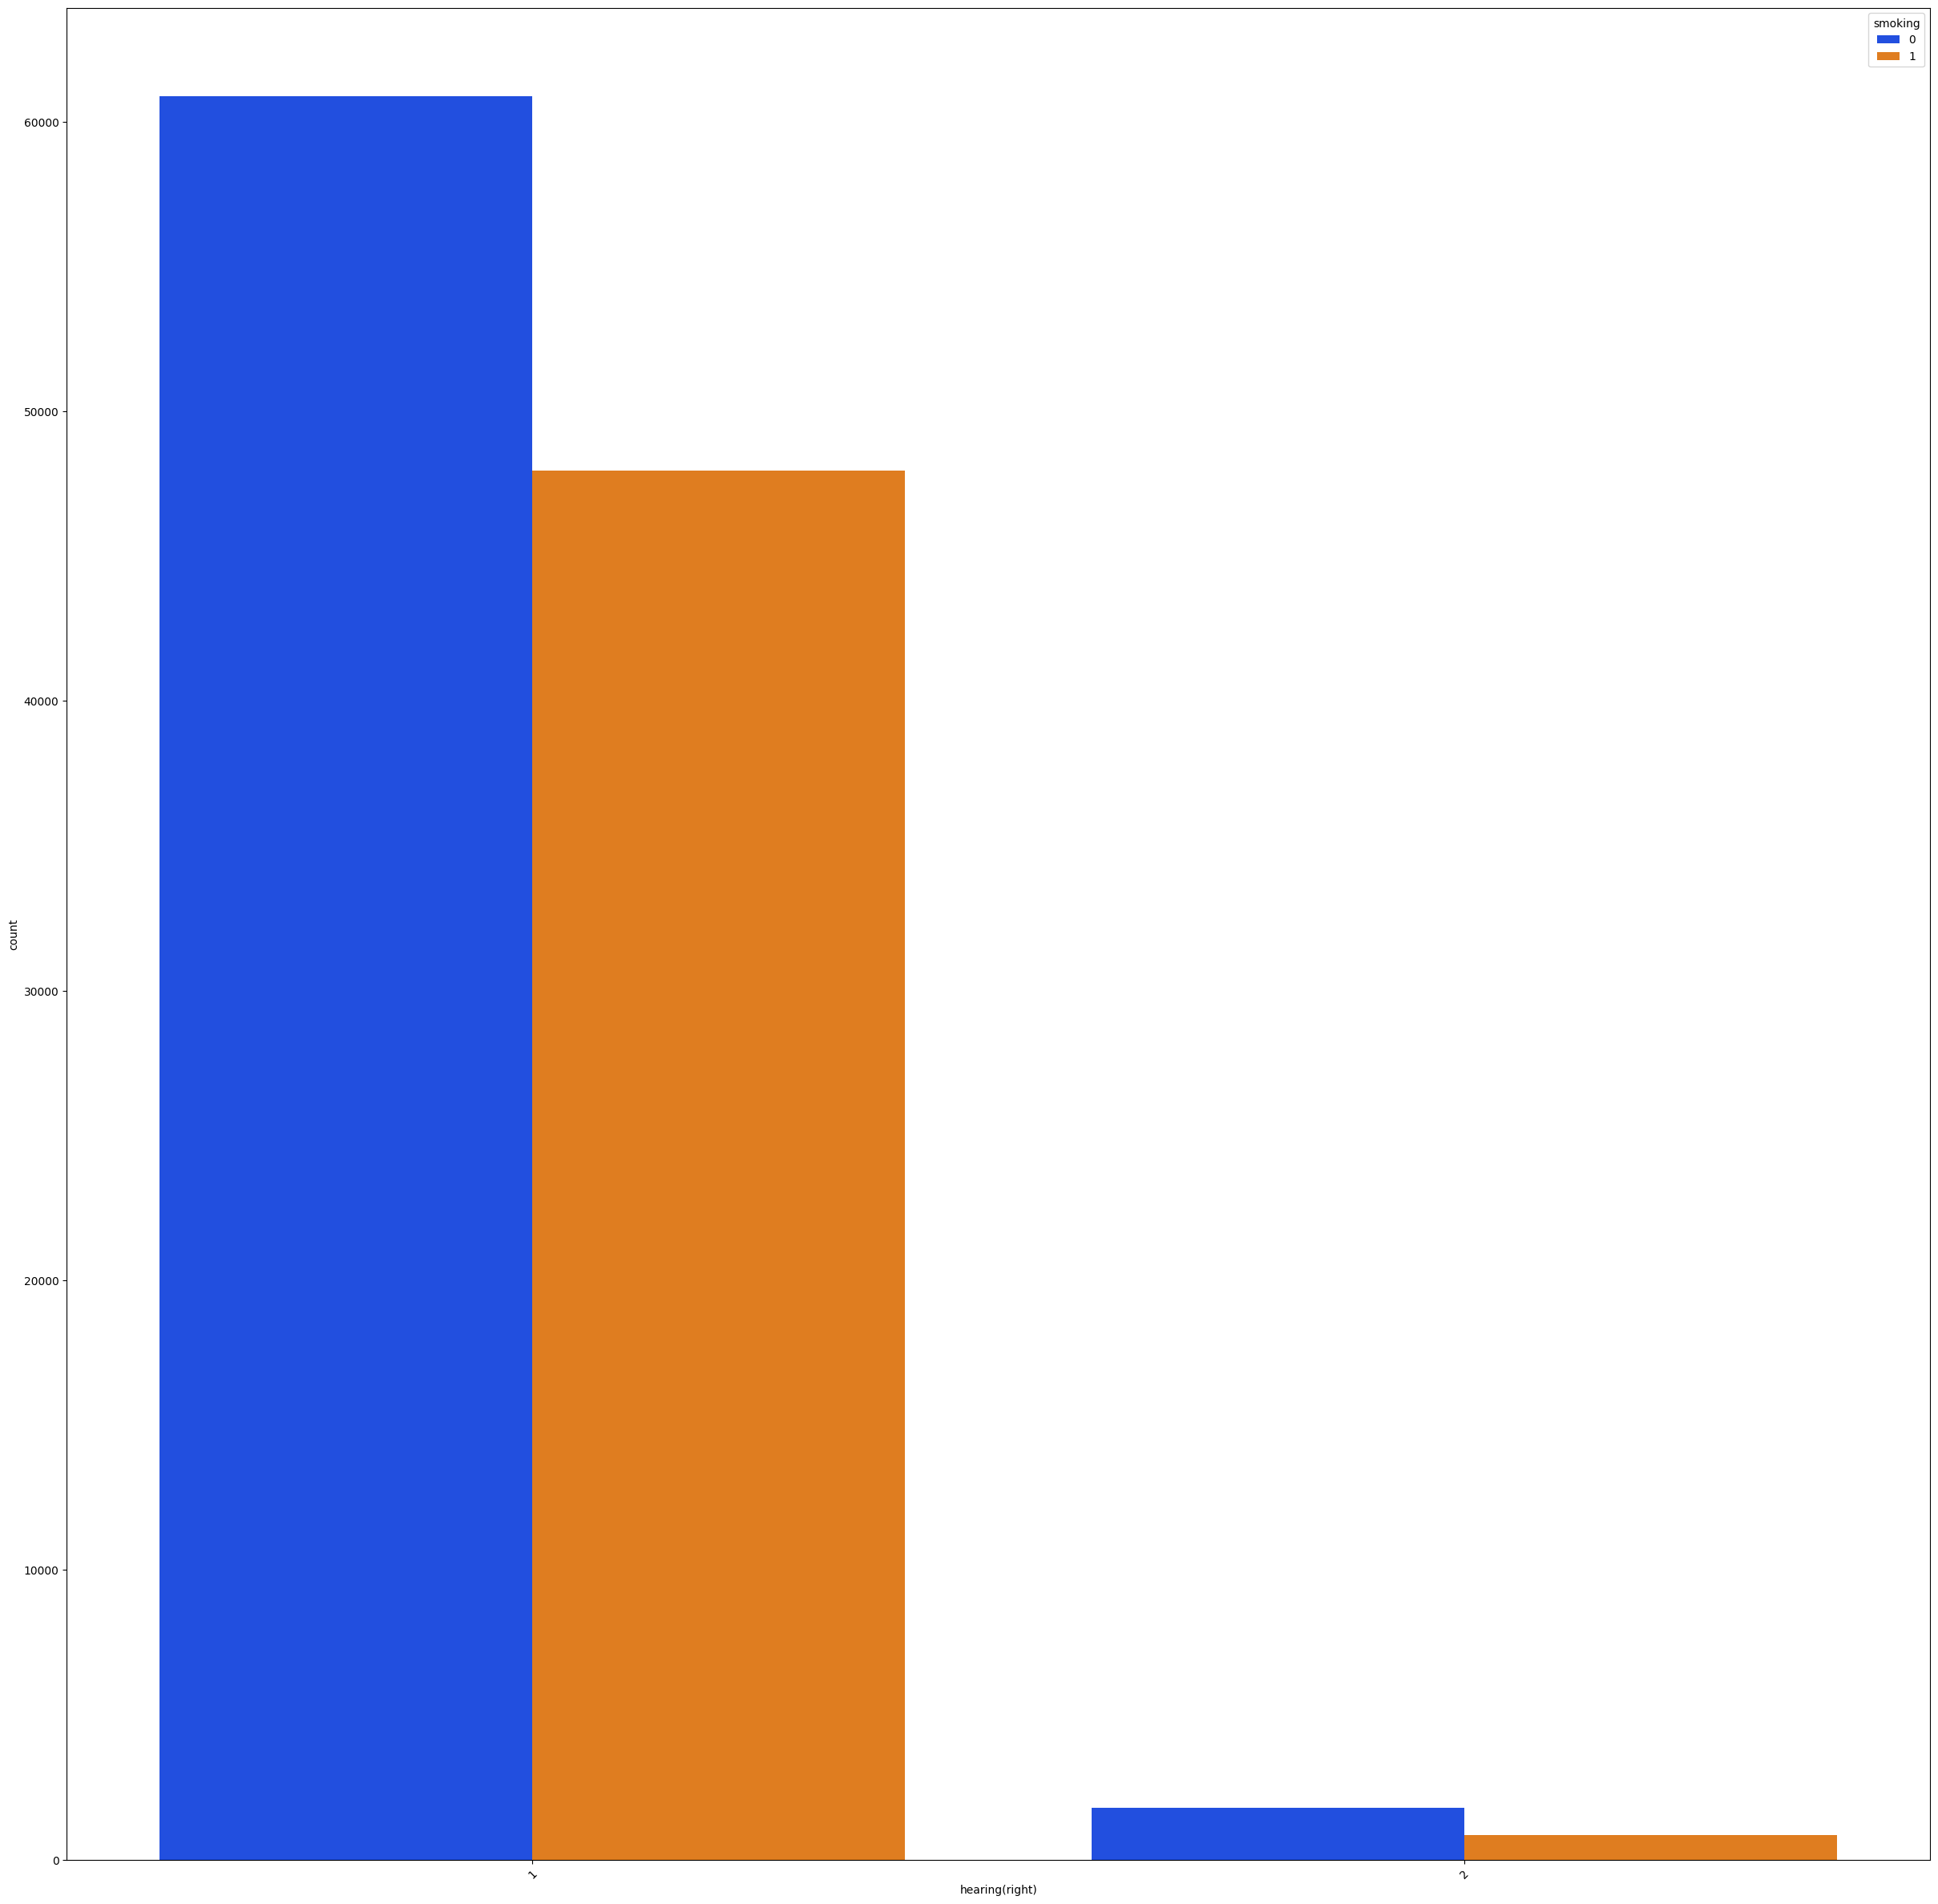

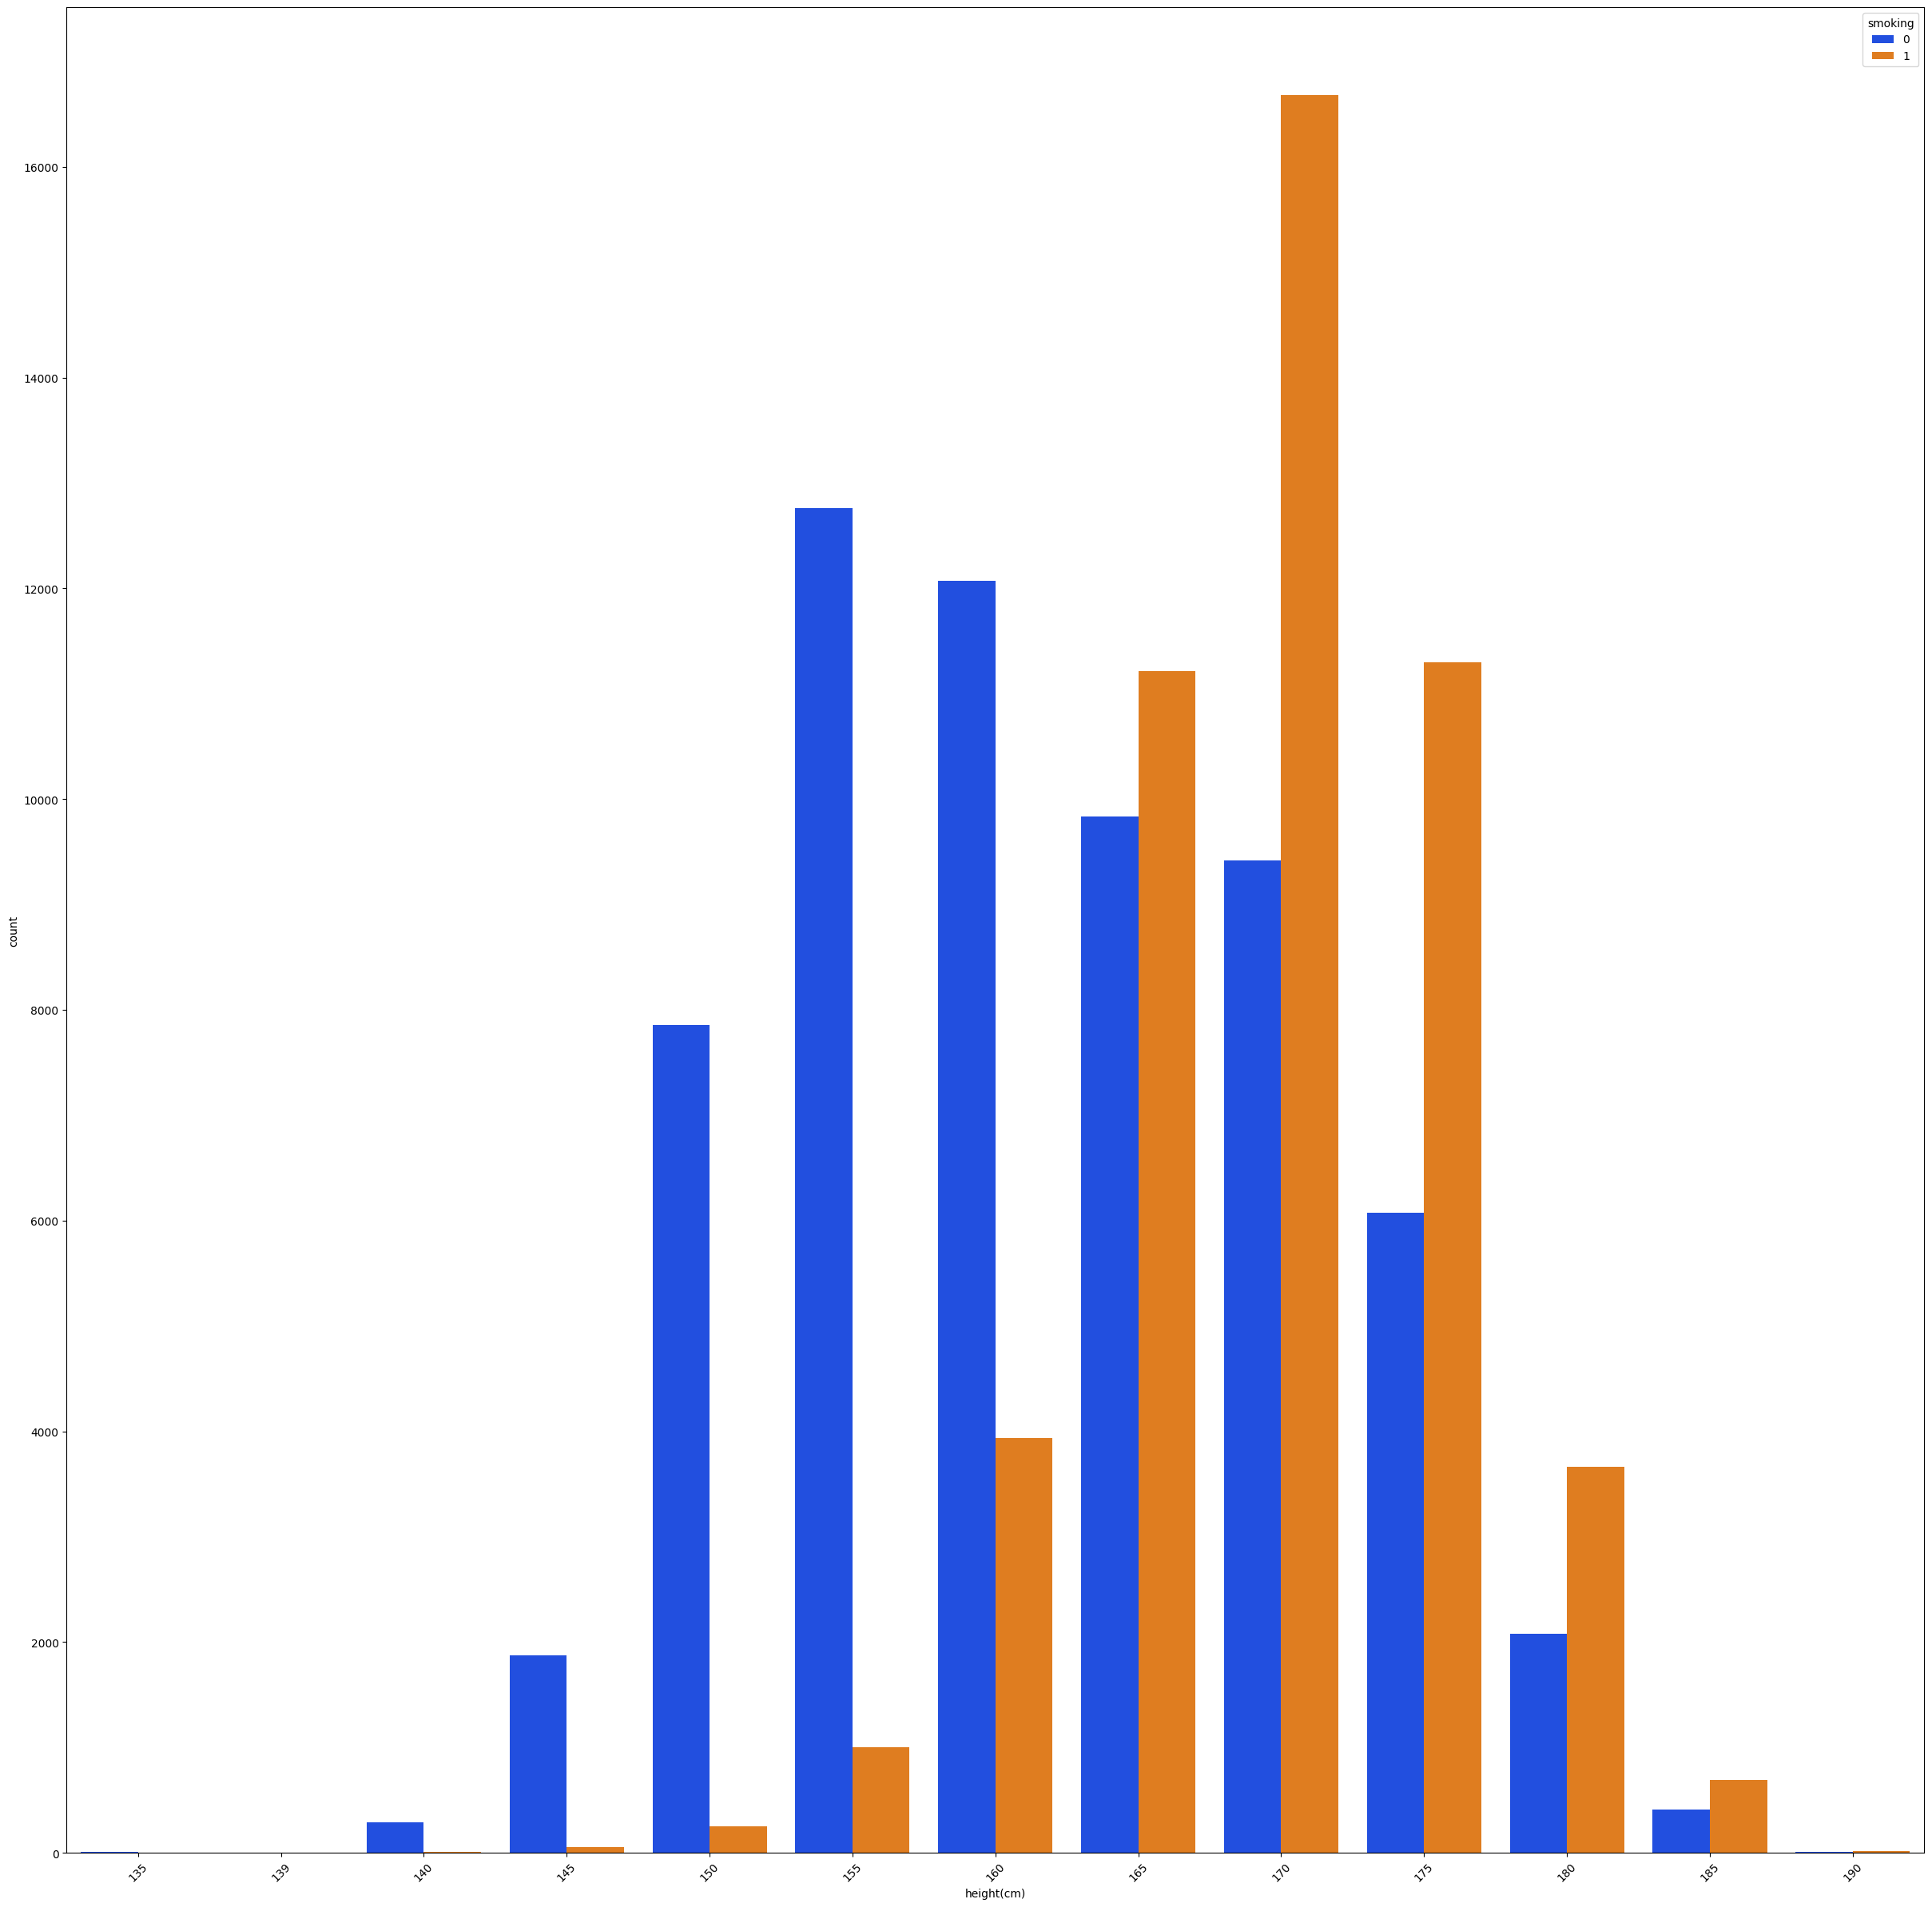

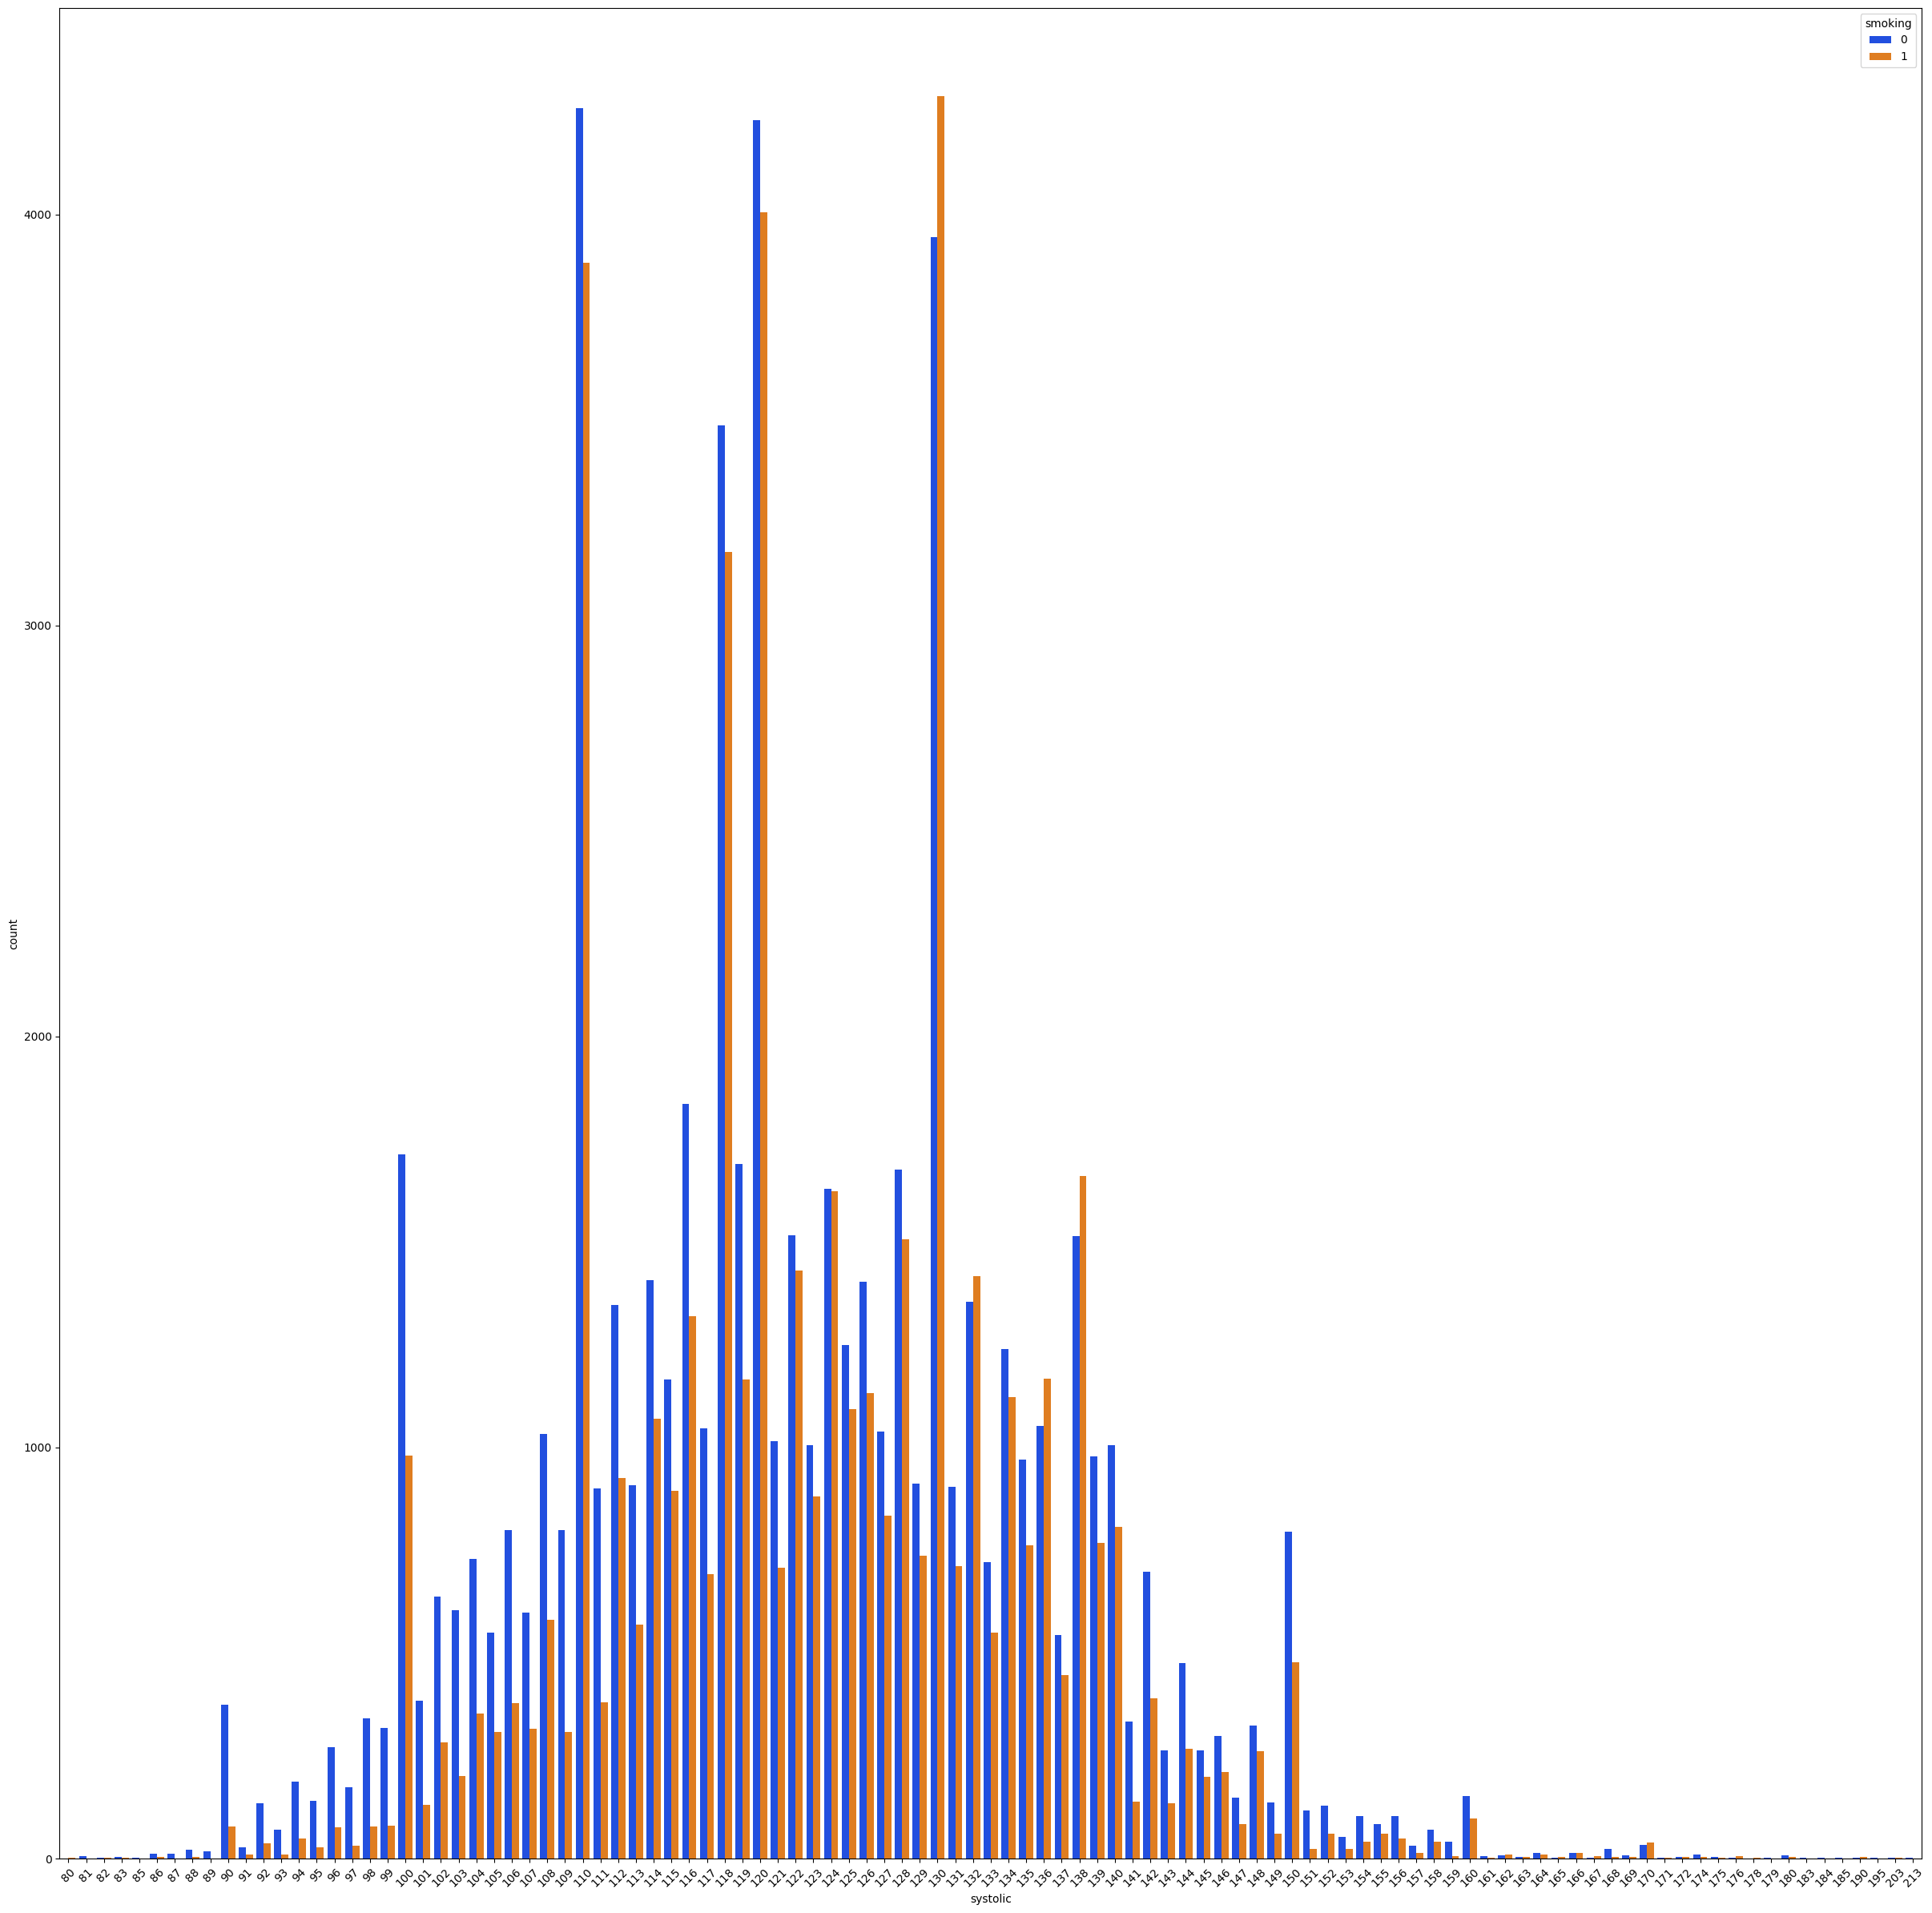

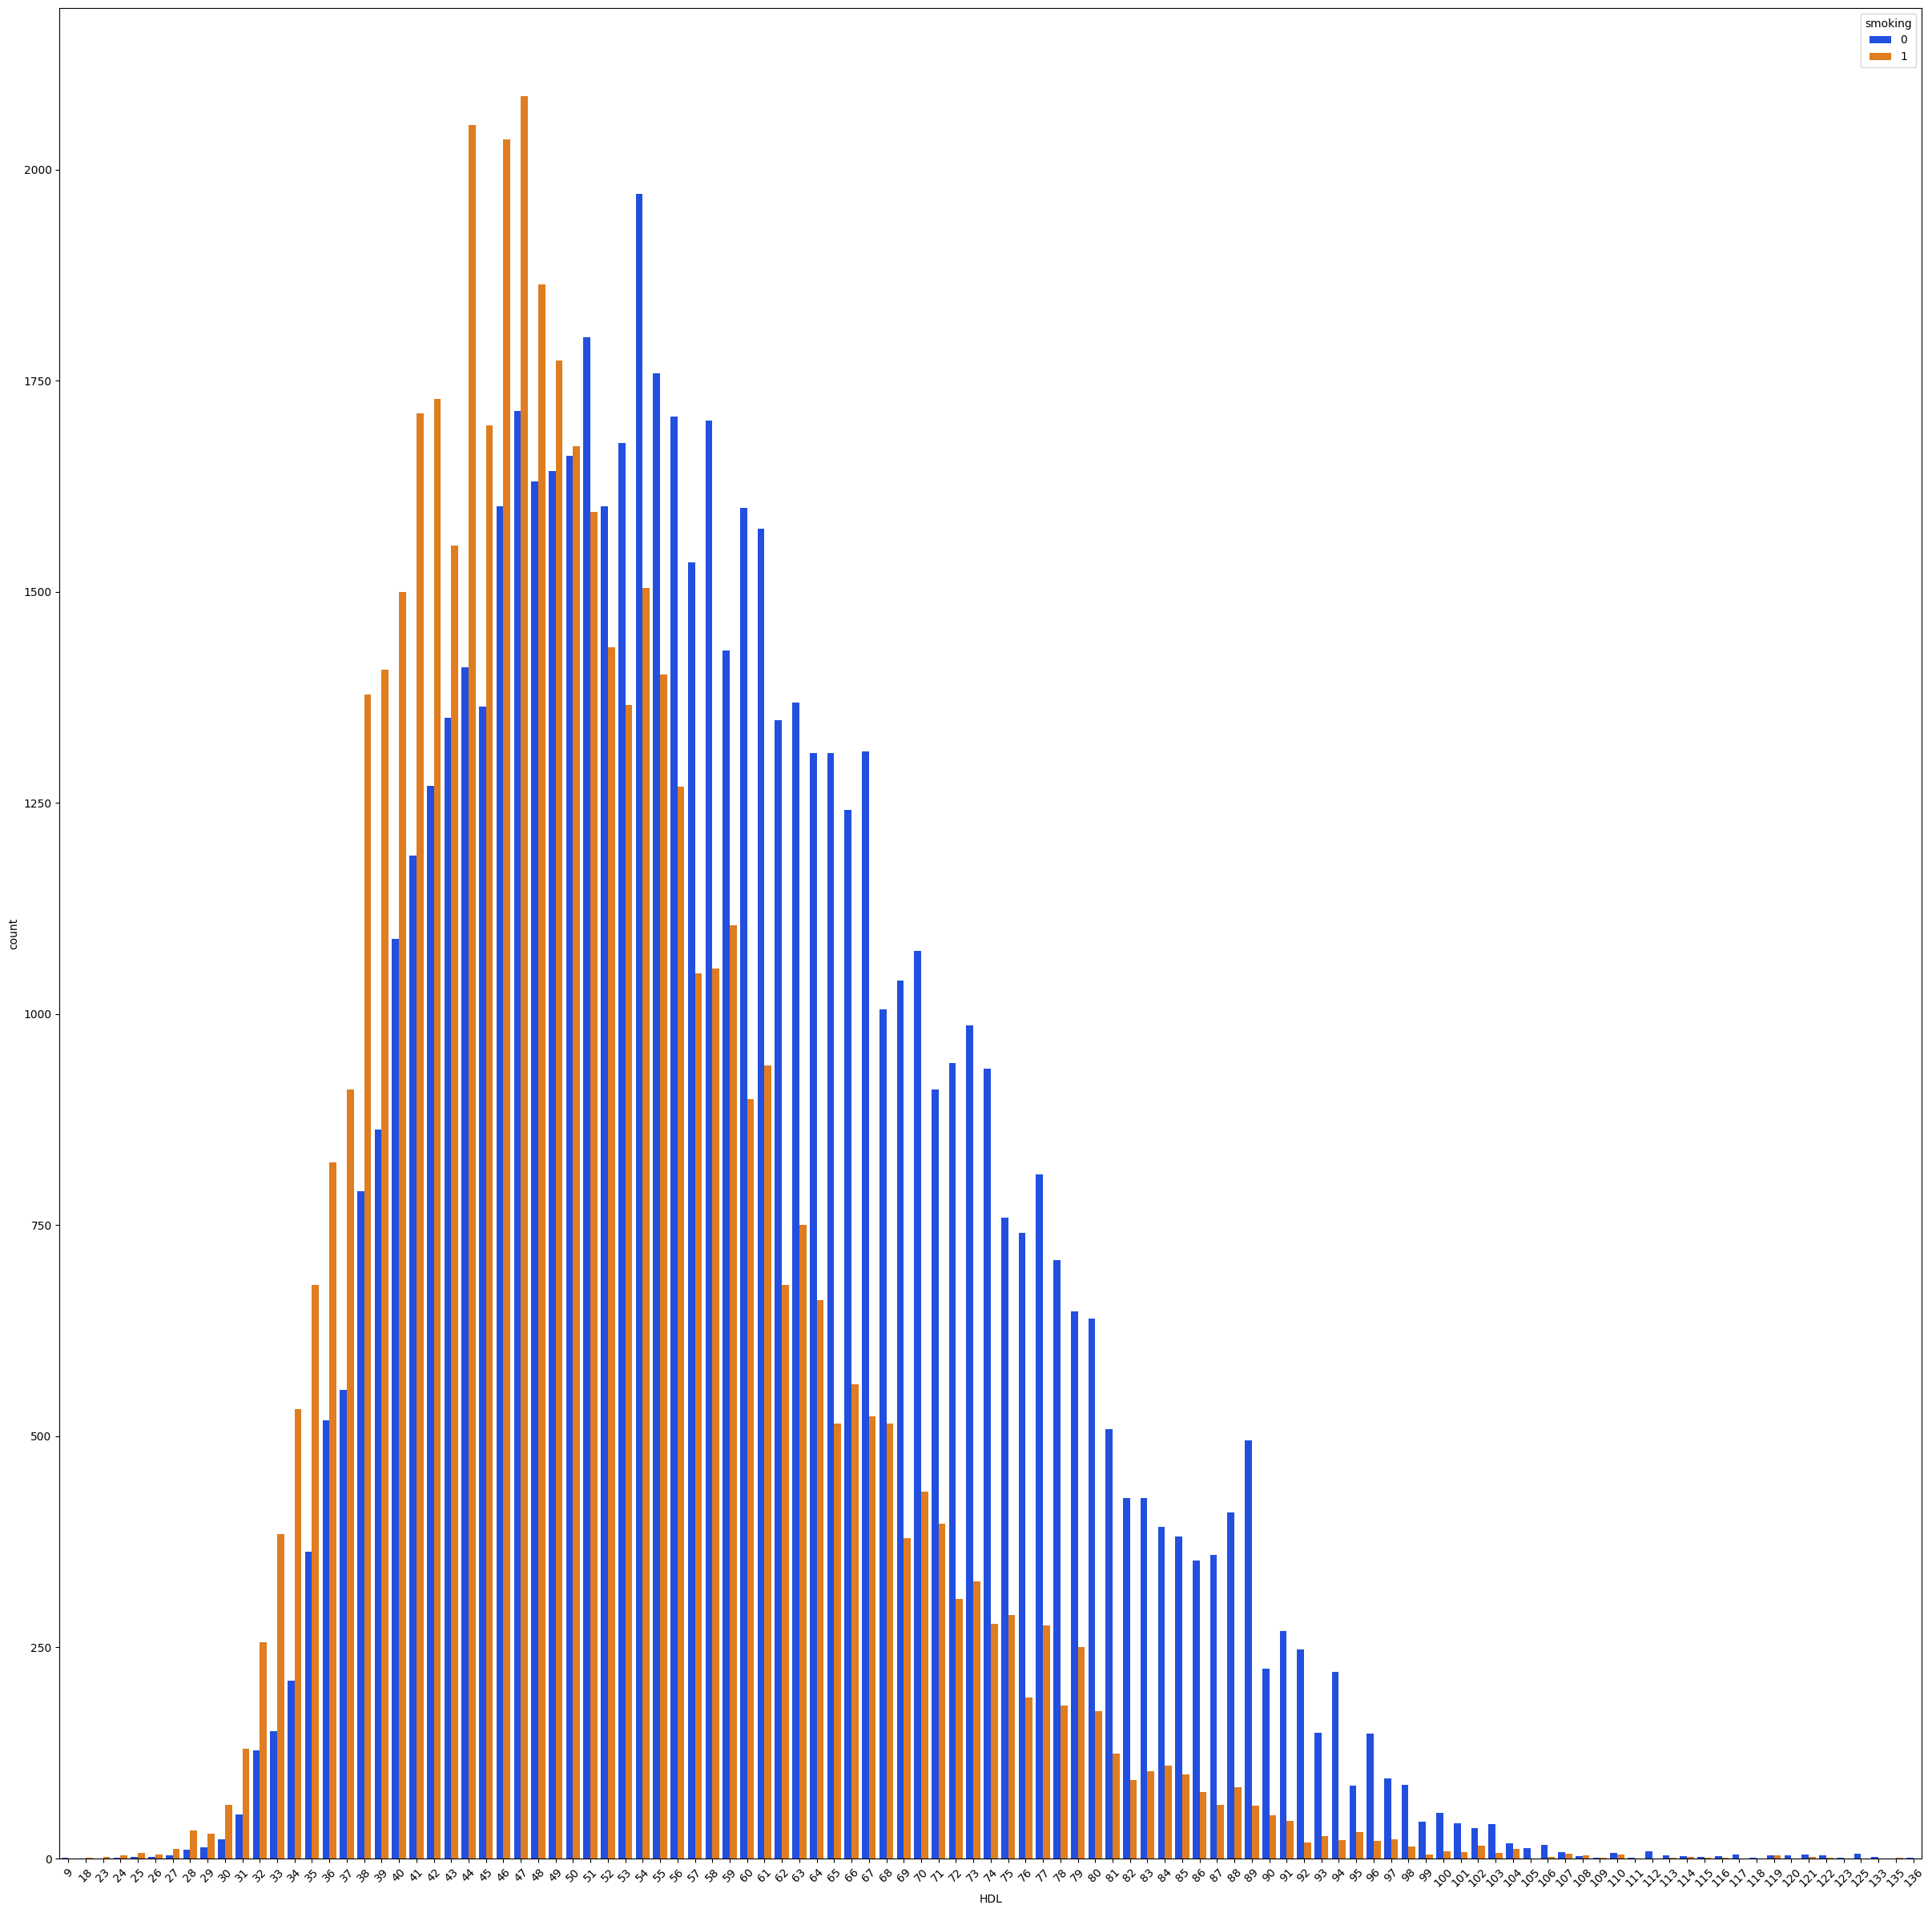

In [46]:
for feature in data_train.columns[:-1]:
  plt.figure(figsize = (30, 30))
  ax = sns.countplot(data=data_train, x=feature, hue='smoking', palette='bright')
  #plt.tight_layout()  # Adjust layout to prevent overlapping
  plt.xticks(rotation=45)
  plt.show()


*  Based on the height histogram above, we can conclude that the percentage of
smokers compared to non-smokers is greater for people with a height above 170 cm. It can be seen that the majority of smokers (orange) have a height above 170cm. Because, in our opinion, people who are above 170cm tall are mostly adults. Therefore, we agree with the existing dataset because most smokers are adults.
-From HDL diagram it can be seen that non smokers tend to have higher HDL which is healthy.
- According to healthline journal smoking is much more likely to lead to an increased hemoglobin count, which i shown in hemoglobin histogram

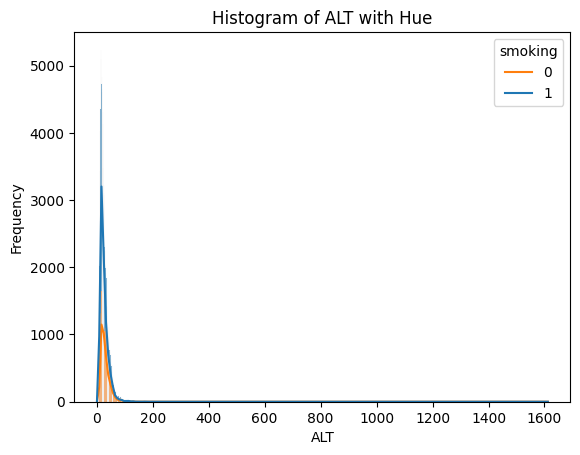

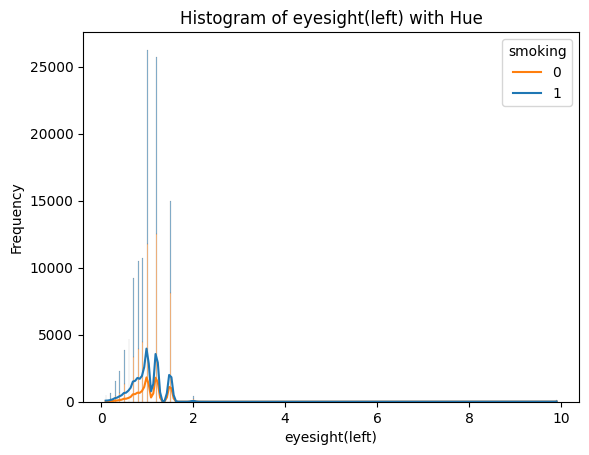

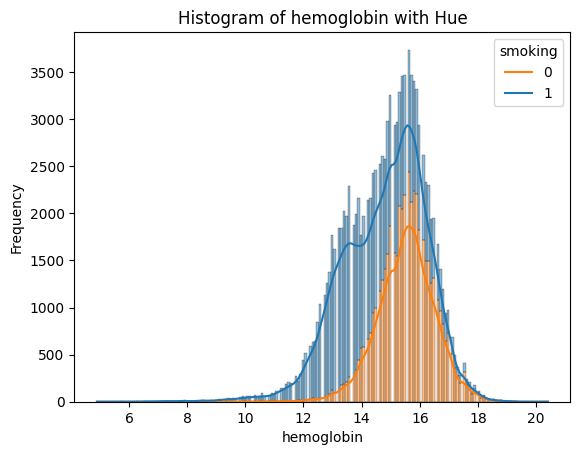

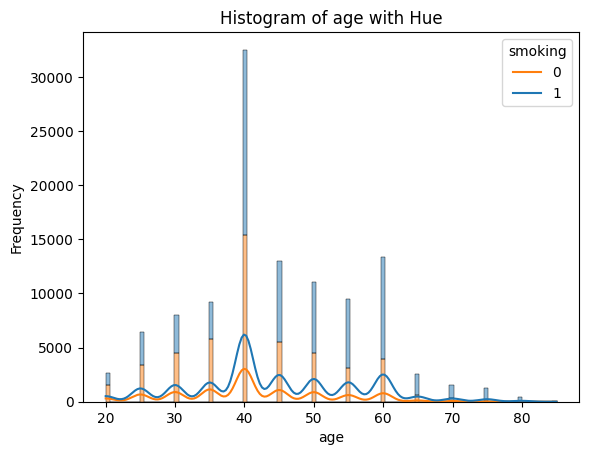

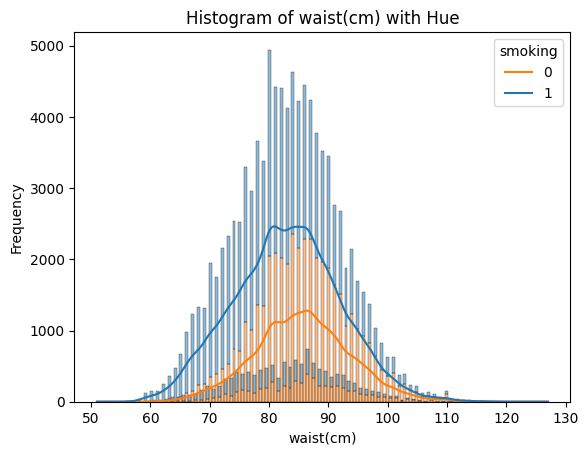

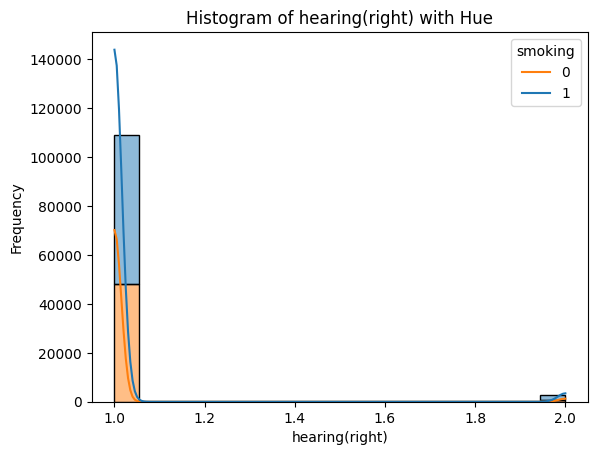

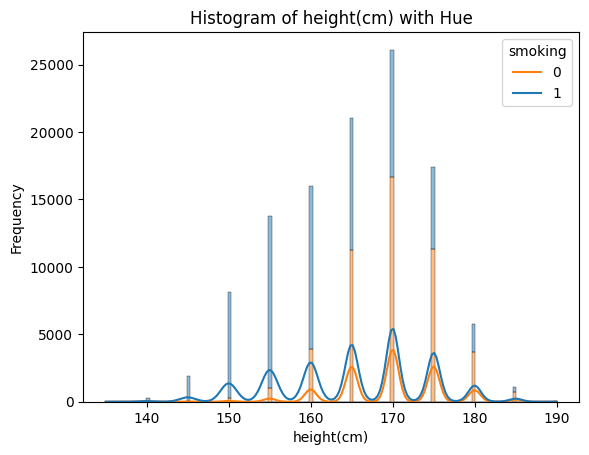

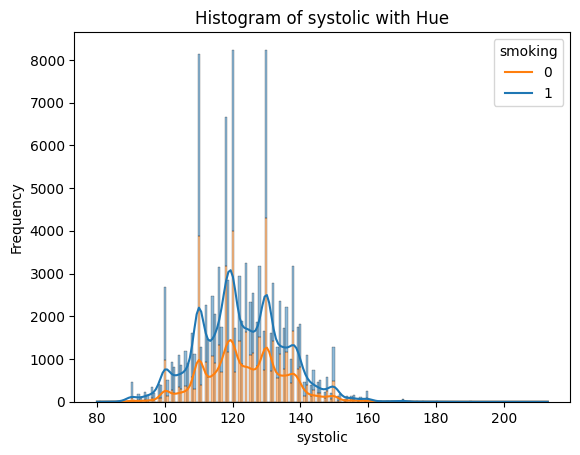

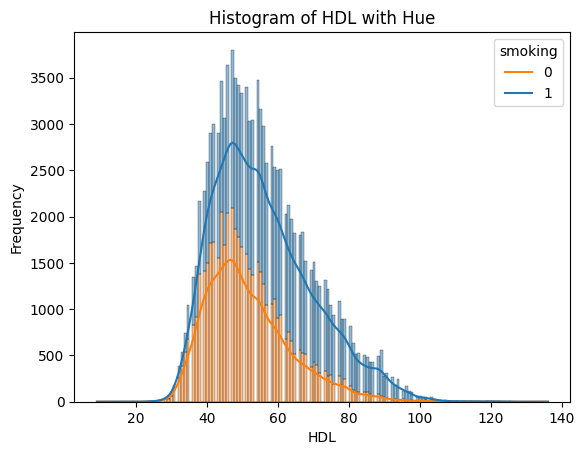

In [50]:
category_labels = {1: '1',0: '0'}

# Plotting histograms for all columns with hue and assigned labels in legend
for column in data_train.columns[:-1]:  # Exclude the last column as it's the 'Category' column
    sns.histplot(data=data_train, x=column, hue='smoking', kde=True, multiple='stack', palette='tab10')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} with Hue')
    plt.legend(title='smoking', labels=[category_labels[0], category_labels[1]])
    plt.show()

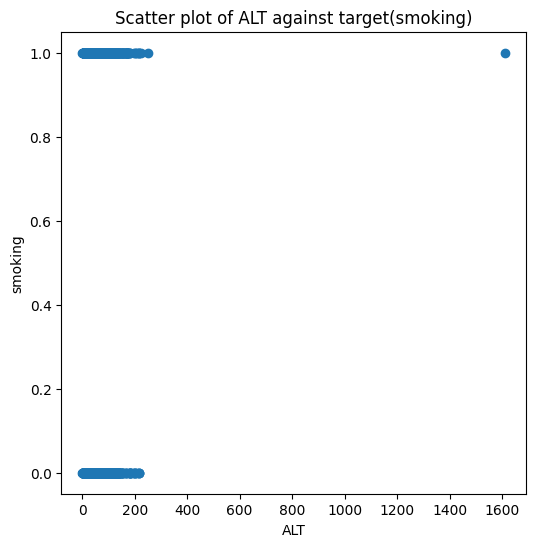

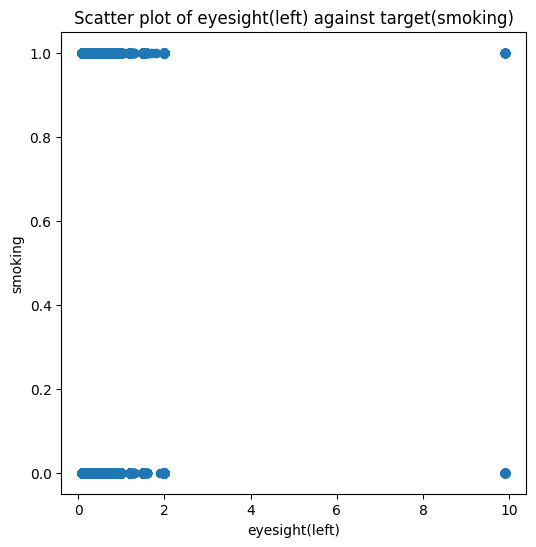

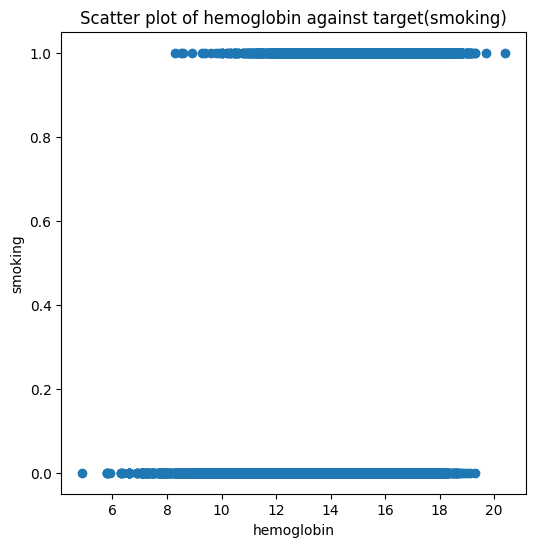

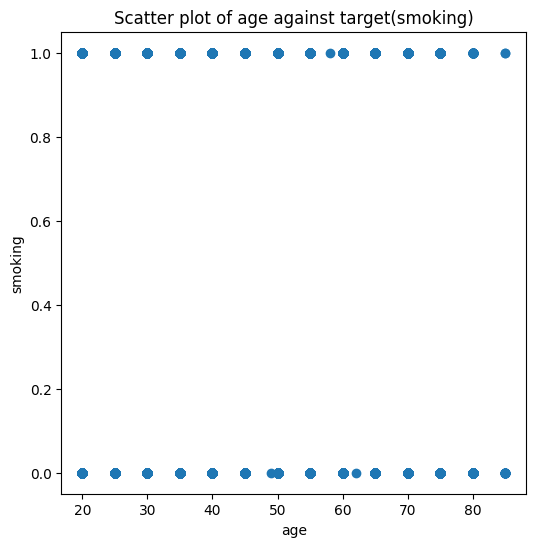

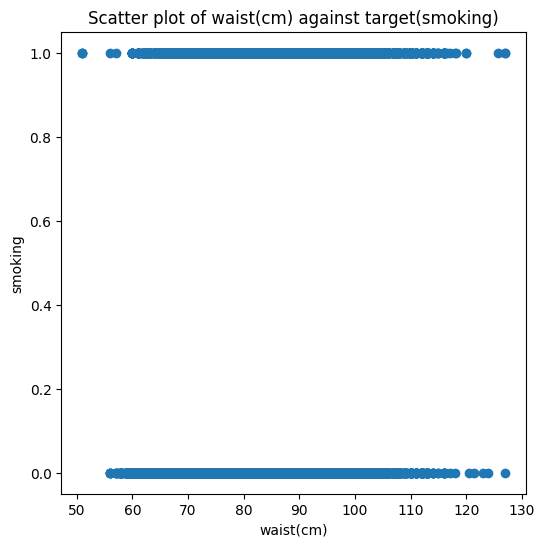

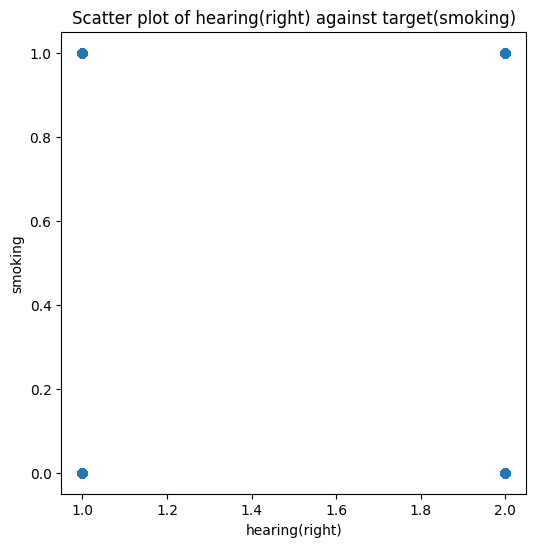

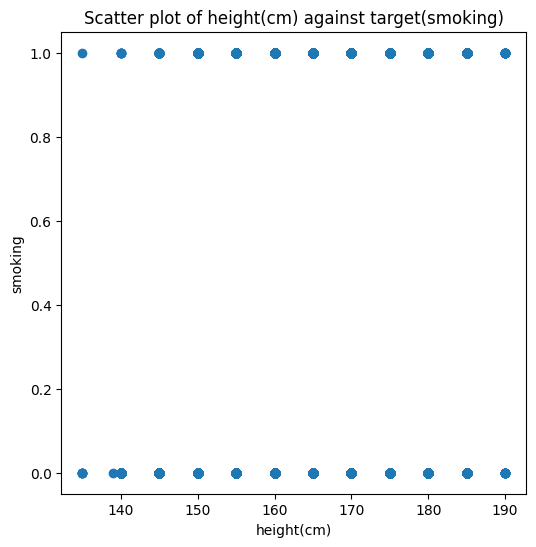

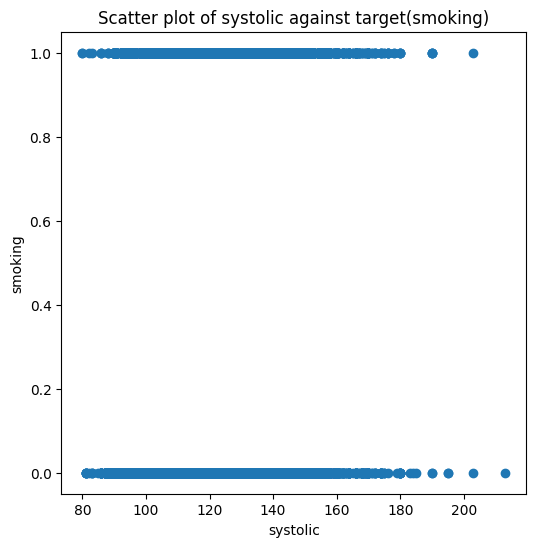

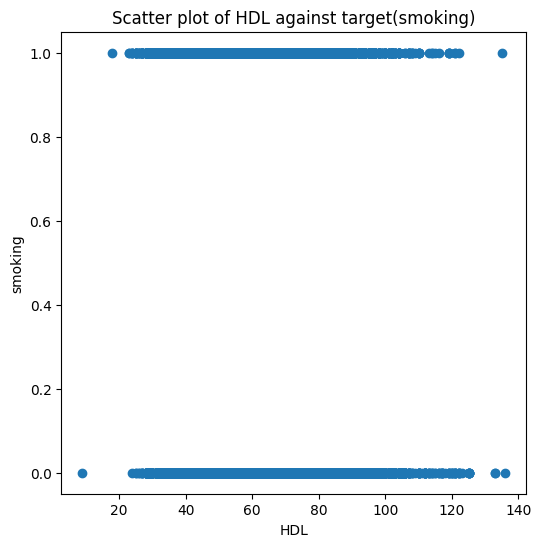

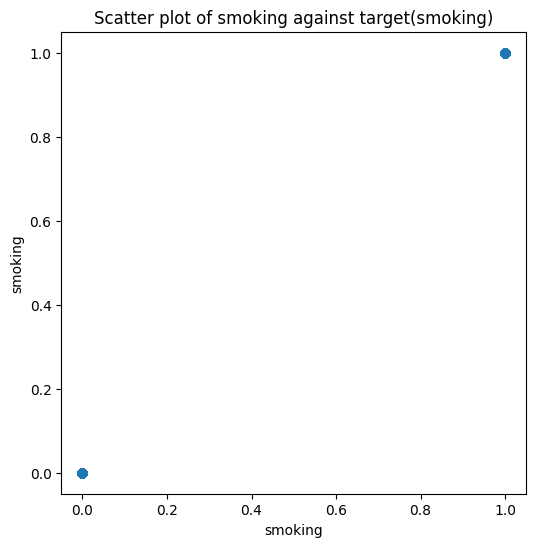

In [48]:
for feature in features:
   plt.figure(figsize=(6, 6))
   plt.scatter(data_train[feature], data_train['smoking'])
   plt.xlabel(feature)
   plt.ylabel('smoking')
   plt.title('Scatter plot of {} against target(smoking)'.format(feature))
   plt.show()

From the results of this data analysis, it can be concluded that there is a positive correlation between height and hemoglobin levels in the blood and the possibility of a person becoming a smoker. In particular, the level of smoking tendency tends to increase with increases in  height and hemoglobin levels.

# Multivariate Analysis

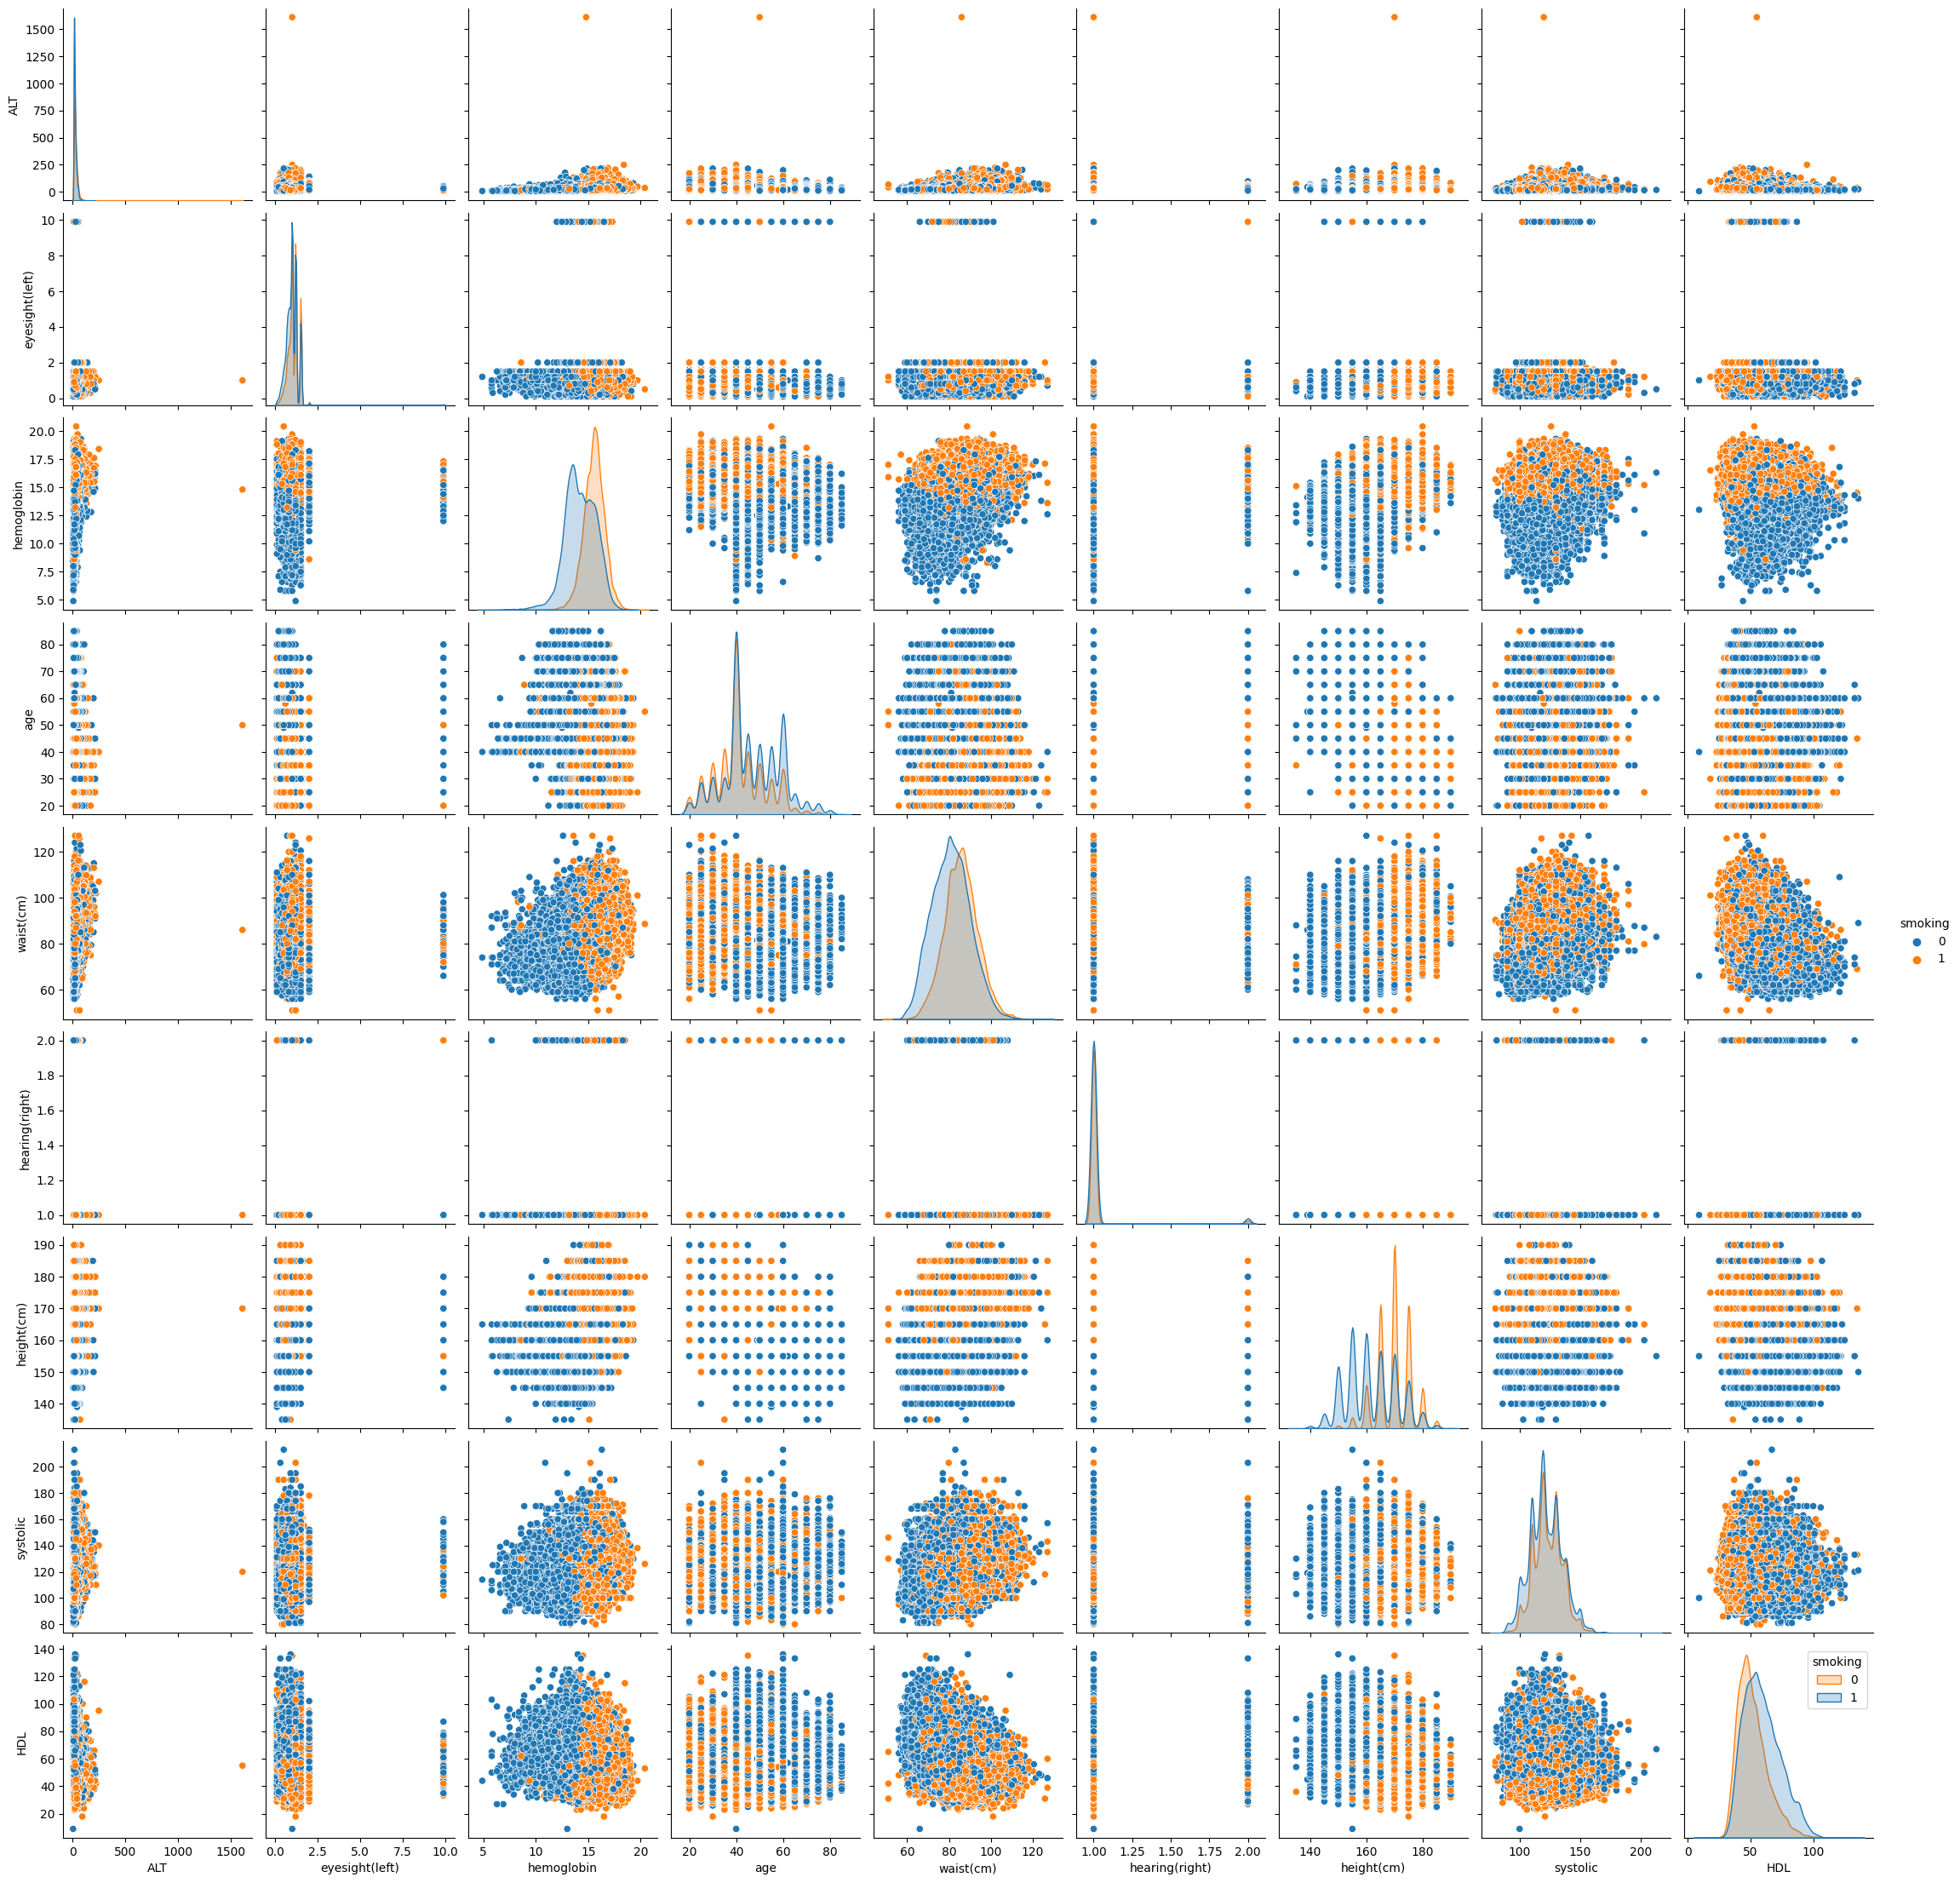

In [51]:
sns.pairplot(data_train, hue='smoking')
plt.legend(title='smoking', labels=[category_labels[0], category_labels[1]])
plt.show()